#Azure Data Lake Connection

**NOTE: This notebook contains the Access Key to your group's Azure Data Lake, which has the confidential dataset for your group project.** 

**DO NOT SHARE THE ACCESS KEY OR THIS FIILE OUTSIDE OF YOUR GROUP**

### Structure of your data lake

Each of the group has a Azure Data Lake. Within each data lake, there are two blob containers:

- **data**: where your group project dataset is stored; and
- **workspace**: where you can store any temporary files or result datasets for your group project

The data lake is programmatically accessible using the access key of the data lake. Once set, you can use the abfss:// path to read from and write to data lake.

In [3]:
# This is the access key for the datalake "mma865whitecaps".

spark.conf.set(
  "fs.azure.account.key.mma865whitecaps.dfs.core.windows.net",
  "63/zYyuIxqTSM0TGQAV54Vng8Sk+Va6+o8yniHPPgLH904pldCbH/dK37wsPnbyqWVoEb6P64qEWdinQrFf25w==")

Below are some examples of filesystem operations in data lake. Read more about dbutils.fs here: https://docs.databricks.com/user-guide/databricks-file-system.html#dbfs

Files in "data" blob container

In [6]:
# Listing files in data

dbutils.fs.ls("abfss://data@mma865whitecaps.dfs.core.windows.net/")

Out[532]: [FileInfo(path='abfss://data@mma865whitecaps.dfs.core.windows.net/Data_Cleaned.csv', name='Data_Cleaned.csv', size=145572749),
 FileInfo(path='abfss://data@mma865whitecaps.dfs.core.windows.net/Data_Cleaned_Fixed.csv', name='Data_Cleaned_Fixed.csv', size=77307318),
 FileInfo(path='abfss://data@mma865whitecaps.dfs.core.windows.net/Data_Cleaned_Topics.csv', name='Data_Cleaned_Topics.csv', size=93662105),
 FileInfo(path='abfss://data@mma865whitecaps.dfs.core.windows.net/data dict.csv', name='data dict.csv', size=2743)]

Files in "workspace" blob container

In [8]:
# Listing files in workspace

dbutils.fs.ls("abfss://workspace@mma865whitecaps.dfs.core.windows.net/")

Out[533]: []

In [9]:
# Reading data from Azure Data Lake

df = spark.read.csv(path='abfss://data@mma865whitecaps.dfs.core.windows.net/Data_Cleaned_Fixed.csv',header=True)
dict= spark.read.csv(path='abfss://data@mma865whitecaps.dfs.core.windows.net/data dict.csv',header=True)

In [10]:
display(dict)

Element Description Building_Key/ID Building Identifier Client_Key Client Identifier (client id 5 = client key 5, client ID 13 = client key 25) Region_Name Client Region Name Province Province of the building at which the service took place City City of the building at which the service took place LeaseInd Indicator of whether the building is leased (1) or owned (0) Property_Usage How the property is used Rentable_SQFT Area of the building Floor Floor-location of the issue causing the work order - not provided Area Area-location of the issue causing the work order - not provided Suite Suite-location of the issue causing the work order - not provided WorkOrder_Nbr Work order number (unique) Parent_WorkOrderNbr The overarching work order numbers, under which there may be (smaller) child work orders Description Document Work order description captured at the source of the work order Resolution Document The detailed text notes entered at completion of the work order WorkOrder_Priority_Desc Priority of the work order completion WorkOrderSource_Cd How the work order was called in (email, RealHelp = call centre, WebRequest = web form, RealMaintenance = maintenance scheduling system reminder) WorkOrderStatus_Desc Status of the task (focus on closed and complete) WorkOrderType_Cd Type of work order (use desc) WorkOrderType_Desc1 Type of work order Creation_Date Date the work order request was created Completion_Date Actual completion date of the work order TargetCompletion_Date Date the service was to be completed by Func_Burdened_Cost Cost of the work order Vendor_Key Vendor description (see other table) ServiceProvider_Class Landlord = the work was done by FM Co., Vendor = the work was done by a third party vendor ServiceProvider_Type A breakdown of the work provided by a 'Landlord' type Serviceprovider_class Vendor_Type Grouping of vendor by specialty ServiceType_Cd Lowest level type of service required ServiceType_Name Name of service type code ServiceType_Desc Description of service type code BOMA_Sub_Category Benchmarking category Q 1 Was the work performed to your satisfaction ? Yes/No - not provided Q 2 Was the work completed in a timely manner ? Yes/No - not provided Q 3 Did you find our staff to be courteous and professional while responding to your request ? Yes/No - not provided Q4 Could you please rate the overall service on a scale of 1 to 4 where 1 is unsatisfactory and 4 is excellent ? Ignore 0 and null and blank - not provided Suggestions Customer comments and survey feedback - not provided LoadNote.ACTIONDATE Date progress note was entered - not provided LoadNote.ACTIONTYPE Progress note update category - not provided LoadNote.PROGRESSNOTE Progress note entered - not provided

In [11]:
display(df)


Building_ID Building_Key City LeaseInd Property_Usage Province Region_Name Rentable_SQFT WorkOrder_Nbr Parent_WorkOrderNbr Description_Document Resolution_Document Func_Burdened_Cost ServiceType_Cd ServiceType_Name BOMA_Sub_Category Creation_Date Completion_Date TargetCompletion_Date Work_Duration_Days Estimated_Time_Days off_by_days Vendor_Key ServiceProvider_Class ServiceProvider_Type WorkOrderSource_Cd WorkOrderStatus_Desc WorkOrderType_Cd WorkOrderType_Desc1 WorkOrder_Priority_Desc City_up2 LeaseInd2 Work_Duration_Days_Rounded off_by_days_Rounded doc_lengths Q1068 43628 RICHMOND 0 RET_MIXED USE BC CENTRAL 15785 ClientQ6906722 NA Please check the heating system for Collin and Name 's office. They are finding it too cold although it has been adjusted. All other areas are fine. Thank you. Name Hrs: M-F 8:30-4:30. null 483.34 M26 HVAC REPAIRS REPAIRS & MAINTENANCE 2016-02-19 15:11 2016-02-29 13:32 2016-02-29 19:30 9.931041667 10.17965278 -0.248611111 0 LANDLORD LANDLORD RealHelp COMPLETE SR Service Request ROUTINE RICHMOND 0 10 0 18 Q0102 42634 ANCASTER 1 RET_MIXED USE ON ON WEST 4196 ClientQ8139533 NA Pease attend to replace 1 burnt out light bulb and client is not sure what the light it is. Name believes that the sensor is not working. Name height is standard. BH; M_W 9-6 THF 9-8 SA- 9-4 Completed Just 28th @ 10:00 am. Name light. 217.67 M40 INTERIOR LIGHTING REPAIRS REPAIRS & MAINTENANCE 2018-07-27 10:44 2018-07-28 10:01 2018-07-28 10:37 0.969849537 0.994849537 -0.025 0 LANDLORD FM RealHelp COMPLETE SR Service Request URGENT - CLIENT REQUESTED ANCASTER 1 1 0 27 Q0101 44033 TORONTO 0 CORP ON TOR CORE 351219 ClientQ2217644 NA No power source to the desk where the client is sitting today. The client can look for another desk until someone attends. complete 39.55 M36 ELECTRICAL REPAIRS REPAIRS & MAINTENANCE 2014-04-08 09:05 2014-04-08 11:57 2014-04-08 13:02 0.119259259 0.164398148 -0.045138889 0 LANDLORD LANDLORD RealHelp CLOSED SR Service Request EMERGENCY - CLIENT REQUESTED TORONTO 0 0 0 14 Q0105 44037 TORONTO 0 CORP ON TOR CORE 839823 ClientQ3364919 NA Please investigate / repair the fluorescent tube lights on the floor as the client advises that there are 4 panels of lights that are out. They all went out at the same time and they are in the same row. Two are above the client's desk. Closing Comments: AB: As per tech Name 8 lights have been changed. Name # 18019 56.5 M36 ELECTRICAL REPAIRS REPAIRS & MAINTENANCE 2015-02-04 09:52 2015-02-04 11:34 2015-02-04 13:49 0.070543981 0.164293981 -0.09375 0 LANDLORD LANDLORD RealHelp CLOSED SR Service Request EMERGENCY - CLIENT REQUESTED TORONTO 0 0 0 25 Q0105 44037 TORONTO 0 CORP ON TOR CORE 839823 ClientQ3036779 NA *Related to 13005483*-Please attend and assess all the lights in the Name and Macdonald room. Please replace those that are burnt out and mark those that are ballast issues. Please see client at reception to advise if there complete as per an email from ClientC toAssist 897.56 M36 ELECTRICAL REPAIRS REPAIRS & MAINTENANCE 2014-10-29 13:48 2014-10-29 14:52 2014-10-29 17:44 0.044375 0.163819444 -0.119444444 0 LANDLORD LANDLORD RealHelp CLOSED SR Service Request EMERGENCY - CLIENT REQUESTED TORONTO 0 0 0 20 Q0048 43980 TORONTO 0 CORP ON TOR CORE 128597 ClientQ2088166 NA My team will be in the office until very late tonight. Could you please kindly leave the heating on. We are located in the E&Y tower 10th floor (south-west corner). Leave on until 2am Saturday March 1 2014 complete 100.01 M26 HVAC REPAIRS REPAIRS & MAINTENANCE 2014-02-28 14:12 2014-03-02 11:59 2014-03-03 09:11 1.907430556 2.790763889 -0.883333333 0 LANDLORD LANDLORD E-Mail CLOSED SR Service Request EMERGENCY - CLIENT REQUESTED TORONTO 0 2 -1 21 Q0101 44033 TORONTO 0 CORP ON TOR CORE 351219 ClientQ3353408 NA Please repair a ballast over workstation 010-A07A. The client was advised by a technician who was changing lights that the ballast needs to be repaired. The florescent light bulb is currently out. Name are M

In [12]:
 df.distinct().count()   

Out[537]: 143765

In [13]:
df.dtypes

Out[538]: [('Building_ID', 'string'),
 ('Building_Key', 'string'),
 ('City', 'string'),
 ('LeaseInd', 'string'),
 ('Property_Usage', 'string'),
 ('Province', 'string'),
 ('Region_Name', 'string'),
 ('Rentable_SQFT', 'string'),
 ('WorkOrder_Nbr', 'string'),
 ('Parent_WorkOrderNbr', 'string'),
 ('Description_Document', 'string'),
 ('Resolution_Document', 'string'),
 ('Func_Burdened_Cost', 'string'),
 ('ServiceType_Cd', 'string'),
 ('ServiceType_Name', 'string'),
 ('BOMA_Sub_Category', 'string'),
 ('Creation_Date', 'string'),
 ('Completion_Date', 'string'),
 ('TargetCompletion_Date', 'string'),
 ('Work_Duration_Days', 'string'),
 ('Estimated_Time_Days', 'string'),
 ('off_by_days', 'string'),
 ('Vendor_Key', 'string'),
 ('ServiceProvider_Class', 'string'),
 ('ServiceProvider_Type', 'string'),
 ('WorkOrderSource_Cd', 'string'),
 ('WorkOrderStatus_Desc', 'string'),
 ('WorkOrderType_Cd', 'string'),
 ('WorkOrderType_Desc1', 'string'),
 ('WorkOrder_Priority_Desc', 'string'),
 ('City_up2', 'string'),
 ('LeaseInd2', 'string'),
 ('Work_Duration_Days_Rounded', 'string'),
 ('off_by_days_Rounded', 'string'),
 ('doc_lengths', 'string')]

In [14]:
from pyspark.sql.functions import col, unix_timestamp, to_date,to_timestamp,from_unixtime
from pyspark.sql.types import *

df = df.withColumn('Creation_Date',to_timestamp('Creation_Date',"yyyy-MM-dd HH:mm").cast("timestamp"))
df = df.withColumn('Completion_Date',to_timestamp('Completion_Date',"yyyy-MM-dd HH:mm").cast("timestamp"))
df = df.withColumn('TargetCompletion_Date',to_timestamp('TargetCompletion_Date',"yyyy-MM-dd HH:mm").cast("timestamp"))
df = df.withColumn("Work_Duration_Days_Rounded", df["Work_Duration_Days_Rounded"].cast(IntegerType()))
df = df.withColumn("Rentable_SQFT", df["Rentable_SQFT"].cast(IntegerType()))
df = df.withColumn("off_by_days_Rounded", df["off_by_days_Rounded"].cast(IntegerType()))
df = df.withColumn("doc_lengths", df["doc_lengths"].cast(IntegerType()))
df = df.withColumn("LeaseInd", df["LeaseInd"].cast(IntegerType()))
df = df.withColumn("LeaseInd2", df["LeaseInd2"].cast(IntegerType()))
df = df.withColumn("Work_Duration_Days", df["Work_Duration_Days"].cast(DoubleType()))
df = df.withColumn("Estimated_Time_Days", df["Estimated_Time_Days"].cast(DoubleType()))
df = df.withColumn("off_by_days", df["off_by_days"].cast(DoubleType()))
df = df.withColumn("Func_Burdened_Cost", df["Func_Burdened_Cost"].cast(DoubleType()))
df.dtypes

Out[539]: [('Building_ID', 'string'),
 ('Building_Key', 'string'),
 ('City', 'string'),
 ('LeaseInd', 'int'),
 ('Property_Usage', 'string'),
 ('Province', 'string'),
 ('Region_Name', 'string'),
 ('Rentable_SQFT', 'int'),
 ('WorkOrder_Nbr', 'string'),
 ('Parent_WorkOrderNbr', 'string'),
 ('Description_Document', 'string'),
 ('Resolution_Document', 'string'),
 ('Func_Burdened_Cost', 'double'),
 ('ServiceType_Cd', 'string'),
 ('ServiceType_Name', 'string'),
 ('BOMA_Sub_Category', 'string'),
 ('Creation_Date', 'timestamp'),
 ('Completion_Date', 'timestamp'),
 ('TargetCompletion_Date', 'timestamp'),
 ('Work_Duration_Days', 'double'),
 ('Estimated_Time_Days', 'double'),
 ('off_by_days', 'double'),
 ('Vendor_Key', 'string'),
 ('ServiceProvider_Class', 'string'),
 ('ServiceProvider_Type', 'string'),
 ('WorkOrderSource_Cd', 'string'),
 ('WorkOrderStatus_Desc', 'string'),
 ('WorkOrderType_Cd', 'string'),
 ('WorkOrderType_Desc1', 'string'),
 ('WorkOrder_Priority_Desc', 'string'),
 ('City_up2', 'string'),
 ('LeaseInd2', 'int'),
 ('Work_Duration_Days_Rounded', 'int'),
 ('off_by_days_Rounded', 'int'),
 ('doc_lengths', 'int')]

In [15]:
import datetime
from pyspark.sql.functions import year, month, dayofmonth,dayofweek,dayofyear,weekofyear,hour,minute

df=df.withColumn("TargetCompletion_Year", year("TargetCompletion_Date"))
df=df.withColumn("TargetCompletion_month", month("TargetCompletion_Date"))
df=df.withColumn("TargetCompletion_day", dayofmonth("TargetCompletion_Date"))
df=df.withColumn("TargetCompletion_dayofweek", dayofweek("TargetCompletion_Date"))
df=df.withColumn("TargetCompletion_week", weekofyear("TargetCompletion_Date"))
df=df.withColumn("TargetCompletion_hour", hour("TargetCompletion_Date"))
df=df.withColumn("Creation_Year", year("Creation_Date"))
df=df.withColumn("Creation_month", month("Creation_Date"))
df=df.withColumn("Creation_day", dayofmonth("Creation_Date"))
df=df.withColumn("Creation_dayofweek", dayofweek("Creation_Date"))
df=df.withColumn("Creation_week", weekofyear("Creation_Date"))
df=df.withColumn("Creation_hour", hour("Creation_Date"))
df.dtypes

Out[540]: [('Building_ID', 'string'),
 ('Building_Key', 'string'),
 ('City', 'string'),
 ('LeaseInd', 'int'),
 ('Property_Usage', 'string'),
 ('Province', 'string'),
 ('Region_Name', 'string'),
 ('Rentable_SQFT', 'int'),
 ('WorkOrder_Nbr', 'string'),
 ('Parent_WorkOrderNbr', 'string'),
 ('Description_Document', 'string'),
 ('Resolution_Document', 'string'),
 ('Func_Burdened_Cost', 'double'),
 ('ServiceType_Cd', 'string'),
 ('ServiceType_Name', 'string'),
 ('BOMA_Sub_Category', 'string'),
 ('Creation_Date', 'timestamp'),
 ('Completion_Date', 'timestamp'),
 ('TargetCompletion_Date', 'timestamp'),
 ('Work_Duration_Days', 'double'),
 ('Estimated_Time_Days', 'double'),
 ('off_by_days', 'double'),
 ('Vendor_Key', 'string'),
 ('ServiceProvider_Class', 'string'),
 ('ServiceProvider_Type', 'string'),
 ('WorkOrderSource_Cd', 'string'),
 ('WorkOrderStatus_Desc', 'string'),
 ('WorkOrderType_Cd', 'string'),
 ('WorkOrderType_Desc1', 'string'),
 ('WorkOrder_Priority_Desc', 'string'),
 ('City_up2', 'string'),
 ('LeaseInd2', 'int'),
 ('Work_Duration_Days_Rounded', 'int'),
 ('off_by_days_Rounded', 'int'),
 ('doc_lengths', 'int'),
 ('TargetCompletion_Year', 'int'),
 ('TargetCompletion_month', 'int'),
 ('TargetCompletion_day', 'int'),
 ('TargetCompletion_dayofweek', 'int'),
 ('TargetCompletion_week', 'int'),
 ('TargetCompletion_hour', 'int'),
 ('Creation_Year', 'int'),
 ('Creation_month', 'int'),
 ('Creation_day', 'int'),
 ('Creation_dayofweek', 'int'),
 ('Creation_week', 'int'),
 ('Creation_hour', 'int')]

In [16]:
display(df.groupBy("Vendor_Key").count().orderBy("Vendor_Key"))

Vendor_Key count 0 108398 675342 74 676625 12 676627 44 676630 31 676640 29 676642 28 676653 111 676663 17 679041 155 679139 716 679216 37 679223 66 679229 7 679490 1 681059 36 681061 15 681064 15 681522 266 682461 31 682760 138 682761 12 682971 30 683085 1549 683091 12 683102 7 683342 103 684853 19 684995 1 684996 22 684997 2 685008 28 685009 50 685460 12 685732 50 686080 26 686125 24 686388 11 686392 63 686511 105 688653 67 689289 1 689431 219 689608 6 689745 182 689746 19 690656 4 690784 65 690866 1 690891 4 691307 90 691314 3 691557 1 692745 2 692758 1 692759 4 692991 84 693064 41 693194 193 694310 26 695699 7 695732 7 695741 6 696125 67 696962 16 697482 28 697565 11 698799 2 698801 2 699168 21 699686 8 699707 4 699724 216 700680 3 700749 20 700796 7 701184 13 701531 40 702141 18 704681 15 707748 16 707783 9 707976 3 708088 5 708209 9 708401 53 708664 116 708673 494 708850 1 709099 8 709672 1 709796 1 709840 4 710209 3 711893 80 712410 50 712413 3 712417 12 713156 20 713970 39 714048 9 714416 1 714580 1 715206 1 716012 3 716243 2 716267 1081 716788 79 717097 1 719726 1 720241 2 720715 155 721078 2 721270 4 722904 2 723420 1 723998 17 724272 63 724988 3 725260 168 725391 88 725398 23 726271 25 726276 249 726289 13 726366 11 726515 5 726658 9 726692 1 726756 6 726858 5 726950 10 727168 4 727640 112 729352 15 729423 96 730148 29 730567 4 731635 6 731831 3 731832 88 732013 211 732019 643 732020 1 732597 18 732844 5 732857 8 733688 2 734017 3 734380 9 735369 9 735714 112 735868 120 736363 78 736390 1 736391 1 736475 1 736996 2 737570 1 740728 11 740731 84 740863 8 742472 1 742612 1 742632 1 743525 1 745776 6 747852 36 748974 67 748978 3 749762 44 750411 48 751838 2 753772 129 753785 1 753795 34 753797 1 753798 4 754237 4 754739 1 754789 1 755058 47 755698 4 756054 2 756726 1 756830 39 756831 26 756832 22 756834 12 756839 1 756841 55 756842 13 756844 2 756847 17 756848 1 756852 2 756891 48 756895 1 756928 14 756934 7 759316 1 759363 272 761388 66 762216 1 762838 2 763598 5 766556 1 767116 15 767119 3 767782 2 770653 1 770778 2 773941 78 774099 30 776249 35 777043 30 777511 54 777560 1 777564 43 777611 10 779791 62 780076 1 780145 6 780150 8 780172 1 781461 7 782233 15 782883 1 783879 1 783914 23 784147 55 784616 19 785689 8 785690 147 785692 122 785703 33 785715 87 786784 169 787332 175 787651 7 787658 7 787659 4 787731 8 787733 2 787740 114 788830 69 789428 2 790125 15 790433 1 790445 159 790481 76 790482 57 790483 140 790485 1 792768 18 793046 124 793110 323 793686 1 793932 39 793933 2 794166 31 794716 4 794828 74 795246 5 795391 14 795392 39 795956 48 796068 908 796226 4 796254 18 796324 210 796425 278 796645 1 796756 1 796775 1 796820 1 798952 96 798987 6 799123 8 799383 13 799400 16 799412 24 799441 175 799465 581 799473 6 799489 4 799503 29 799511 1 799516 3 799581 307 799610 2 799611 1 799703 208 799704 27 799758 15 799761 18 799790 31 799816 216 799880 1 799888 1 799898 228 799901 5 799929 12 799968 27 800003 45 800010 95 800042 6 800064 545 800072 9 800094 108 800103 195 800115 3 800147 23 800148 131 800156 3 800279 1 800288 259 800322 61 800349 17 800351 3 800358 1582 800388 2 800433 47 800439 16 800466 259 800469 1 800510 25 800544 631 800591 2 800597 7 800637 19 800638 7 800729 1 800750 18 800757 679 800767 5 800783 178 800881 296 800904 69 800911 12 800931 102 800939 40 800957 4 800996 535 801019 33 801164 1 801175 220 801196 6 801269 7 801271 5 801272 2 801356 28 801382 948 801385 265 801421 420 801450 49 801452 541 801464 4 801517 2 801524 261 801528 1668 801541 1 801559 2 801574 228 801594 396 801615 1 801628 1 801685 1 801696 16 801714 3 801755 11 801759 3 801929 3 801937 4 801940 2 801941 550 801942 5 801943 3 801947 1 801948 2 801951 291 801953 2 802562 2 804526 2 804531 14 805206 17 805338 3 805683 13 806064 1 806088 7 806430 8 806538 25 806542 78 806859 2 807078 616 807494 39 807495 1 808710 2 808924 5 808935 8 809081 4 809518 2 809635 1 809770 286 809954 1 810043 5 810070 1 810102 160 810531 4 810638 1 8109

In [17]:
# Spark SQL

df.createOrReplaceTempView("BGIS")
display(spark.sql("SELECT * FROM BGIS"))


Building_ID Building_Key City LeaseInd Property_Usage Province Region_Name Rentable_SQFT WorkOrder_Nbr Parent_WorkOrderNbr Description_Document Resolution_Document Func_Burdened_Cost ServiceType_Cd ServiceType_Name BOMA_Sub_Category Creation_Date Completion_Date TargetCompletion_Date Work_Duration_Days Estimated_Time_Days off_by_days Vendor_Key ServiceProvider_Class ServiceProvider_Type WorkOrderSource_Cd WorkOrderStatus_Desc WorkOrderType_Cd WorkOrderType_Desc1 WorkOrder_Priority_Desc City_up2 LeaseInd2 Work_Duration_Days_Rounded off_by_days_Rounded doc_lengths TargetCompletion_Year TargetCompletion_month TargetCompletion_day TargetCompletion_dayofweek TargetCompletion_week TargetCompletion_hour Creation_Year Creation_month Creation_day Creation_dayofweek Creation_week Creation_hour Q1068 43628 RICHMOND 0 RET_MIXED USE BC CENTRAL 15785 ClientQ6906722 NA Please check the heating system for Collin and Name 's office. They are finding it too cold although it has been adjusted. All other areas are fine. Thank you. Name Hrs: M-F 8:30-4:30. null 483.34 M26 HVAC REPAIRS REPAIRS & MAINTENANCE 2016-02-19T15:11:00.000+0000 2016-02-29T13:32:00.000+0000 2016-02-29T19:30:00.000+0000 9.931041667 10.17965278 -0.248611111 0 LANDLORD LANDLORD RealHelp COMPLETE SR Service Request ROUTINE RICHMOND 0 10 0 18 2016 2 29 2 9 19 2016 2 19 6 7 15 Q0102 42634 ANCASTER 1 RET_MIXED USE ON ON WEST 4196 ClientQ8139533 NA Pease attend to replace 1 burnt out light bulb and client is not sure what the light it is. Name believes that the sensor is not working. Name height is standard. BH; M_W 9-6 THF 9-8 SA- 9-4 Completed Just 28th @ 10:00 am. Name light. 217.67 M40 INTERIOR LIGHTING REPAIRS REPAIRS & MAINTENANCE 2018-07-27T10:44:00.000+0000 2018-07-28T10:01:00.000+0000 2018-07-28T10:37:00.000+0000 0.969849537 0.994849537 -0.025 0 LANDLORD FM RealHelp COMPLETE SR Service Request URGENT - CLIENT REQUESTED ANCASTER 1 1 0 27 2018 7 28 7 30 10 2018 7 27 6 30 10 Q0101 44033 TORONTO 0 CORP ON TOR CORE 351219 ClientQ2217644 NA No power source to the desk where the client is sitting today. The client can look for another desk until someone attends. complete 39.55 M36 ELECTRICAL REPAIRS REPAIRS & MAINTENANCE 2014-04-08T09:05:00.000+0000 2014-04-08T11:57:00.000+0000 2014-04-08T13:02:00.000+0000 0.119259259 0.164398148 -0.045138889 0 LANDLORD LANDLORD RealHelp CLOSED SR Service Request EMERGENCY - CLIENT REQUESTED TORONTO 0 0 0 14 2014 4 8 3 15 13 2014 4 8 3 15 9 Q0105 44037 TORONTO 0 CORP ON TOR CORE 839823 ClientQ3364919 NA Please investigate / repair the fluorescent tube lights on the floor as the client advises that there are 4 panels of lights that are out. They all went out at the same time and they are in the same row. Two are above the client's desk. Closing Comments: AB: As per tech Name 8 lights have been changed. Name # 18019 56.5 M36 ELECTRICAL REPAIRS REPAIRS & MAINTENANCE 2015-02-04T09:52:00.000+0000 2015-02-04T11:34:00.000+0000 2015-02-04T13:49:00.000+0000 0.070543981 0.164293981 -0.09375 0 LANDLORD LANDLORD RealHelp CLOSED SR Service Request EMERGENCY - CLIENT REQUESTED TORONTO 0 0 0 25 2015 2 4 4 6 13 2015 2 4 4 6 9 Q0105 44037 TORONTO 0 CORP ON TOR CORE 839823 ClientQ3036779 NA *Related to 13005483*-Please attend and assess all the lights in the Name and Macdonald room. Please replace those that are burnt out and mark those that are ballast issues. Please see client at reception to advise if there complete as per an email from ClientC toAssist 897.56 M36 ELECTRICAL REPAIRS REPAIRS & MAINTENANCE 2014-10-29T13:48:00.000+0000 2014-10-29T14:52:00.000+0000 2014-10-29T17:44:00.000+0000 0.044375 0.163819444 -0.119444444 0 LANDLORD LANDLORD RealHelp CLOSED SR Service Request EMERGENCY - CLIENT REQUESTED TORONTO 0 0 0 20 2014 10 29 4 44 17 2014 10 29 4 44 13 Q0048 43980 TORONTO 0 CORP ON TOR CORE 128597 ClientQ2088166 NA My team will be in the office until very late tonight. Could you please kindly leave the heating on. We are located in the E&Y tower 10th floo

In [18]:
display(spark.sql("SELECT  distinct ServiceProvider_Type,ServiceProvider_Class FROM BGIS"))

ServiceProvider_Type ServiceProvider_Class MARKETING/ADVERTISING VENDOR LANDLORD LANDLORD EMPLOYEE DISPATCH VENDOR CLIENT SERVICES/TENANT VENDOR FURNISHING/INSTALL/REPAIR VENDOR LAB/WATER TESTING VENDOR RD LANDLORD UNQUALIFIED SMALL VENDOR VENDOR TECH LANDLORD PROPMGR LANDLORD PROJECT CONSULTANT VENDOR FURNISHINGS/SUPPLY ONLY VENDOR SUB CONTRACTOR-OTHER VENDOR OPS MGR LANDLORD OVERHEAD DOORS VENDOR PROJECT CONTRACTOR VENDOR GEN CONTRACTOR_NON PROJECT VENDOR UTILITIES VENDOR LEASE VENDOR WINDOWS & DOORS VENDOR MATERIALS - NO SERVICE VENDOR EMPLOYEE LANDLORD CLIENT LANDLORD SIGNAGE VENDOR PLUMBING VENDOR EMPLOYEE VENDOR FM LANDLORD LANDLORD VENDOR FIRE & LIFE SAFETY VENDOR DOORS & LOCKS VENDOR FOOD SERVICES/CATERING VENDOR SECURITY VENDOR JANITORIAL VENDOR INTERCOMPANY VENDOR GEN CONTRACTOR_NONPROJECT VENDOR GOVERNMENT AGENCY VENDOR CONSULTANT_NON PROJECT VENDOR TECH OU LANDLORD COMMUNICATION/SUPPLY ONLY VENDOR ELECTRICAL VENDOR CONSTRUCTION/ GEN CONTRTR VENDOR BUILDING MECHANICAL VENDOR HVAC VENDOR DOORS AND LOCKS VENDOR GROUNDS/LANDSCAPING VENDOR

In [19]:
display(df.groupBy("WorkOrderType_Desc1").count().orderBy("WorkOrderType_Desc1"))

WorkOrderType_Desc1 count BJCC Tech Services 10803 Capital Works 51 Captial Project 5 Client Directed Initiatives 615 Corrective Maintenance 4992 Disaster Response 36 Dispatch Center Quotes 49 Energy Related On Demand Requests-Non Project 1 Operational Proactive Service 5874 Preventative Maintenance 33362 Projects 2 Quality Inspection 3 Remote Command Centre 1 Replacement Recommendation 12 Service Complaint 1 Service Request 86749 Tenant Request 1218

In [20]:
display(spark.sql("SELECT  distinct(Property_Usage) FROM BGIS"))

Property_Usage RET_TRAINING CORP_OPS RET_MIXED USE RET_LIMITED SVC MIXED USE MACHINE SEC_SERVICES BUILDING DATA CENTRE N/A RET_INSTORE BR RET_STAND ALONE CONDO RET_SEC_SERVICES CORP WAREHOUSES

In [21]:
display(df.groupBy("Property_Usage").agg({"Func_Burdened_Cost":'Sum'}))

Property_Usage sum(Func_Burdened_Cost) RET_TRAINING 4215.969999999999 CORP_OPS 33943.16 RET_MIXED USE 2.5096962229999855E7 RET_LIMITED SVC 28441.65 MIXED USE 6654.93 MACHINE 232241.87000000005 SEC_SERVICES 1276523.3199999994 BUILDING 721.39 DATA CENTRE 235174.88000000003 N/A 220.59 RET_INSTORE BR 62684.76000000001 RET_STAND ALONE 2.1704606549999937E7 CONDO 2698.6299999999997 RET_SEC_SERVICES 71.65 CORP 9844510.86000001 WAREHOUSES 2626.27

In [22]:
display(spark.sql("SELECT count(*),ServiceProvider_Class FROM BGIS group by ServiceProvider_Class"))

count(1) ServiceProvider_Class 35376 VENDOR 108398 LANDLORD

In [23]:
display(df.groupBy("Building_Key","Building_ID").agg({"Func_Burdened_Cost":'Count'}))

Building_Key Building_ID count(Func_Burdened_Cost) 42628 Q0096 113 43765 Q1205 27 43789 Q1222 44 43543 Q0989 65 43382 Q0829 41 42977 Q0441 131 42545 Q0014 172 43144 Q0605 119 57068 Q1493 110 42824 Q0292 103 43265 Q0721 85 43947 Q0015 290 43734 Q1174 2 43219 Q0678 123 43524 Q0971 3 42675 Q0143 85 42849 Q0317 15 43015 Q0479 156 43164 Q0625 89 42770 Q0238 108 43630 Q1070 39 42639 Q0107 103 43984 Q0052 9 42534 Q0003-30 2 43105 Q0566 87 42842 Q0310 118 42756 Q0224 140 43163 Q0624 127 43847 Q1293 235 43565 Q1010 86 42565 Q0034 34 43387 Q0834 43 43513 Q0960 63 43689 Q1129 5 43355 Q0804 119 68255 Q1464 41 43728 Q1168 3 43546 Q0992 47 43673 Q1113 1 43800 Q1228-30 8 43183 Q0643 136 56590 Q1469 93 43073 Q0536 123 44085 Q0157 1348 43261 Q0717 92 43877 Q1327 101 42633 Q0101 203 43044 Q0508 106 43830 Q1268 3 43555 Q1000 68 43318 Q0769 33 43337 Q0786 120 42535 Q0004 154 43917 Q1377 108 43343 Q0792 60 58725 Q0181 228 43495 Q0944 109 73080 Q1541 16 43089 Q0551 80 43034 Q0498 4 43570 Q1015 65 43420 Q0868 66 43591 Q1036 14 43659 Q1099 2 42978 Q0442 170 42775 Q0243 76 42915 Q0379 108 43725 Q1165 17 43712 Q1152 4 43817 Q1244 76 43249 Q0707 89 43142 Q0603 149 43944 Q0012 604 42681 Q0149 124 68019 Q1596 72 43394 Q0841 37 68737 Q1611 6 43342 Q0791 65 55764 Q1427 98 43619 Q1059 90 43425 Q0873 56 43596 Q1040 63 43128 Q0589 57 42942 Q0406 194 42709 Q0177 122 43115 Q0576 99 43892 Q1347 91 43489 Q0938 76 43204 Q0664 93 42593 Q0061 115 43268 Q0724 11 43335 Q0784 51 43055 Q0519 142 43023 Q0487 7 43057 Q0521 77 43214 Q0674 64 43374 Q0821 165 43916 Q1376 67 42790 Q0258 144 42676 Q0144 89 57067 Q1459 75 43739 Q1179 1 43838 Q1282 65 42697 Q0165 122 42954 Q0418 109 42759 Q0227 122 42818 Q0286 112 44018 Q0086 34 43891 Q1346 122 42892 Q0359 143 42662 Q0130 168 43625 Q1065 122 42729 Q0197 57 44034 Q0102 49 43339 Q0788 112 44057 Q0125 2 55763 Q1313 84 43182 Q0642 19 43590 Q1035 111 55744 Q0171 2 42587 Q0056 131 43870 Q1320 134 43908 Q1366 63 43407 Q0855 78 43914 Q1374 74 63208 Q1563 23 43346 Q0795 46 43907 Q1364 81 42674 Q0142 2 43560 Q1005 79 43912 Q1371 66 43266 Q0722 87 42990 Q0454 58 56813 Q1489 53 68551 Q1583 27 42745 Q0213 90 43175 Q0635 103 43301 Q0758 158 43190 Q0650 11 43606 Q1049 169 57166 Q0177 42 55750 Q1391 3 43433 Q0881 60 42762 Q0230 104 42981 Q0445 130 43272 Q0728 110 43862 Q1308 104 42685 Q0153 133 66023 Q1548 30 43435 Q0883 1 43441 Q0890 50 42811 Q0279 6 43745 Q1185 1 42945 Q0409 112 43003 Q0467 130 42834 Q0302 91 43289 Q0745 79 42992 Q0456 75 43499 Q0948 105 42567 Q0036 38 56187 Q1454 70 44020 Q0088 5 43851 Q1297 161 44071 Q0141 12 43624 Q1064 124 70978 Q0194 20 42580 Q0049 243 43113 Q0574 147 42883 Q0350 63 42715 Q0183 108 42904 Q0368 157 43234 Q0693 57 42578 Q0047 87 43308 Q0764 72 43863 Q1310 61 42640 Q0108 27 43388 Q0835 51 43322 Q0773 27 43002 Q0466 169 43836 Q1280 101 42953 Q0417 76 42949 Q0413 158 43493 Q0942 46 42819 Q0287 7 43562 Q1007 114 43320 Q0771 51 42553 Q0022 232 44021 Q0089 5 55914 Q1372 84 56899 Q1510 2 43637 Q1078 105 43519 Q0966 21 43981 Q0049 20 43950 Q0018 271 43593 Q1037 18 43888 Q1342 77 43176 Q0636 94 43373 Q0820 169 56672 Q1458 72 43550 Q0995 83 43641 Q1082 40 70965 Q1561 13 43692 Q1132 5 65809 Q1573 49 43100 Q0562 45 43061 Q0525 112 43409 Q0857 141 43069 Q0533 57 43834 Q1278 158 44045 Q0113 35 44078 Q0149 53 42807 Q0275 69 43138 Q0599 69 43193 Q0653 47 43749 Q1189 5 45971 Q0003 83 43582 Q1027 87 43989 Q0057 149 44015 Q0083 3 42951 Q0415 151 43774 Q1214 57 58932 Q1559 59 56662 Q0170 59 43418 Q0866 131 43078 Q0541 61 42801 Q0269 90 42829 Q0297 229 57786 Q1508 19 43363 Q0811-30 3 43919 Q1380 100 42851 Q0319 12 43923 Q1394 6 43350 Q0799 32 43551 Q0996 75 44055 Q0123 48 42688 Q0156 72 42793 Q0261 123 42609 Q0077 44 42776 Q0244 204 57909 Q1533 6 42572 Q0041 121 43031 Q0495 66 42724 Q0192 183 43455 Q0904 84 68757 Q0195 15 79381 Q0018 45 43491 Q0940 1 42727 Q0195 150 43397 Q0845 93 43826 Q1252 98 43576 Q1021 136 43911 Q1370 84 43583 Q1028 44 43309 Q0765 152 42872 Q0339 5 63121 Q1540 1 57189 Q1506 68 42878 Q0345 141 42994 Q0458 9

In [24]:
display(df.groupBy("Building_Key","Building_ID").agg({"Func_Burdened_Cost":'Sum'}))

Building_Key Building_ID sum(Func_Burdened_Cost) 42628 Q0096 43764.26000000001 43765 Q1205 14793.09 43789 Q1222 13962.36 43543 Q0989 27831.870000000003 43382 Q0829 30116.910000000003 42977 Q0441 60485.17 42545 Q0014 66098.07999999999 43144 Q0605 47621.57 57068 Q1493 28519.66 42824 Q0292 37373.76 43265 Q0721 30011.999999999996 43947 Q0015 302610.31 43734 Q1174 639.8499999999999 43219 Q0678 51127.43 43524 Q0971 418.82 42675 Q0143 23867.789999999997 42849 Q0317 5131.73 43015 Q0479 58890.53000000002 43164 Q0625 31265.51 42770 Q0238 35990.4 43630 Q1070 11355.189999999999 42639 Q0107 32906.32 43984 Q0052 2013.06 42534 Q0003-30 450.65 43105 Q0566 36111.51 42842 Q0310 48818.44 42756 Q0224 45722.17 43163 Q0624 57173.15999999999 43847 Q1293 71414.08000000005 43565 Q1010 26003.79 42565 Q0034 11883.72 43387 Q0834 30658.540000000005 43513 Q0960 26231.060000000005 43689 Q1129 919.79 43355 Q0804 34122.14999999999 68255 Q1464 13919.13 43728 Q1168 2028.0600000000002 43546 Q0992 32448.35000000001 43673 Q1113 672.6 43800 Q1228-30 3957.49 43183 Q0643 37546.23 56590 Q1469 36550.83000000001 43073 Q0536 53146.51 44085 Q0157 1052725.1900000018 43261 Q0717 41679.19000000001 43877 Q1327 37443.44 42633 Q0101 74970.20999999999 43044 Q0508 38902.26000000001 43830 Q1268 2626.27 43555 Q1000 20912.68 43318 Q0769 11029.359999999999 43337 Q0786 52354.520000000004 42535 Q0004 43589.47 43917 Q1377 41298.48 43343 Q0792 31914.03 58725 Q0181 86418.51999999999 43495 Q0944 39332.15 73080 Q1541 9126.259999999998 43089 Q0551 36399.81 43034 Q0498 1030.5 43570 Q1015 18856.489999999998 43420 Q0868 23230.920000000006 43591 Q1036 4006.4599999999996 43659 Q1099 475.70000000000005 42978 Q0442 73245.42 42775 Q0243 44555.700000000004 42915 Q0379 46184.13999999999 43725 Q1165 2251.9900000000002 43712 Q1152 2221.91 43817 Q1244 32228.010000000002 43249 Q0707 32946.37000000001 43142 Q0603 45573.479999999996 43944 Q0012 200293.18000000017 42681 Q0149 30955.11 68019 Q1596 31019.620000000003 43394 Q0841 16180.730000000001 68737 Q1611 2052.67 43342 Q0791 22938.78 55764 Q1427 44914.78999999999 43619 Q1059 34647.62 43425 Q0873 23702.33 43596 Q1040 23345.450000000004 43128 Q0589 23218.52 42942 Q0406 87484.32999999997 42709 Q0177 48055.65 43115 Q0576 38256.0 43892 Q1347 39575.43000000001 43489 Q0938 17662.309999999998 43204 Q0664 49270.39 42593 Q0061 37626.409999999996 43268 Q0724 2632.4700000000003 43335 Q0784 28489.109999999997 43055 Q0519 53149.729999999996 43023 Q0487 2203.35 43057 Q0521 25431.799999999996 43214 Q0674 23588.620000000003 43374 Q0821 70587.26999999999 43916 Q1376 20871.600000000002 42790 Q0258 61318.53 42676 Q0144 38887.11000000001 57067 Q1459 29411.869999999995 43739 Q1179 340.13 43838 Q1282 30778.680000000004 42697 Q0165 50835.33 42954 Q0418 46873.78999999999 42759 Q0227 46449.14 42818 Q0286 41924.829999999994 44018 Q0086 11881.2 43891 Q1346 40502.54 42892 Q0359 53364.63 42662 Q0130 56537.42999999999 43625 Q1065 30933.11 42729 Q0197 19825.78 44034 Q0102 20787.67 43339 Q0788 45585.43 44057 Q0125 655.23 55763 Q1313 28794.659999999996 43182 Q0642 4661.1 43590 Q1035 37593.72 55744 Q0171 611.34 42587 Q0056 41823.549999999996 43870 Q1320 41674.97 43908 Q1366 26464.32 43407 Q0855 27635.410000000003 43914 Q1374 24475.39 63208 Q1563 10620.480000000001 43346 Q0795 19035.050000000003 43907 Q1364 25037.949999999993 42674 Q0142 561.64 43560 Q1005 38228.969999999994 43912 Q1371 25355.789999999997 43266 Q0722 35468.27 42990 Q0454 21092.859999999997 56813 Q1489 27466.01 68551 Q1583 9856.76 42745 Q0213 27947.929999999997 43175 Q0635 51411.92 43301 Q0758 79736.01 43190 Q0650 6054.21 43606 Q1049 51326.26000000002 57166 Q0177 6854.330000000001 55750 Q1391 1322.63 43433 Q0881 24315.55 42762 Q0230 45175.56 42981 Q0445 56316.58 43272 Q0728 45297.14000000001 43862 Q1308 44380.0 42685 Q0153 49979.59 66023 Q1548 8663.59 43435 Q0883 237.86 43441 Q0890 17561.920000000002 42811 Q0279 1418.9299999999998 43745 Q1185 148.71 42945 Q0409 43295.189999999995 43003 Q0467 62080.16 42834 Q0302 34953.5399999

In [25]:
display(df.groupBy("City_Up2","Region_Name").agg({"Func_Burdened_Cost":'Count'}))

City_Up2 Region_Name count(Func_Burdened_Cost) TORONTO TOR CORE 6417 BURLINGTON CENTRAL 7 OTTAWA EAST 1973 NEPEAN EAST 434 TIMMINS EAST 102 WASAGA BEACH CENTRAL 64 FERGUS ON GTA 124 BANCROFT ON WEST 84 NEPEAN CENTRAL 35 KEMPTVILLE EAST 87 ST LEONARD EAST 345 SASKATOON WEST 840 ST ROMUALD EAST 99 ALLISTON ON WEST 189 BRADFORD ON WEST 105 INNISFIL ON WEST 121 VERMILION WEST 65 COBOURG CENTRAL 78 HALIFAX CENTRAL 1 CHARLOTTETOWN EAST 403 BETHANY EAST 64 MOUNT FOREST ON GTA 90 WOODSTOCK EAST 112 STONEY CREEK ON WEST 499 VIRGIL ON WEST 124 MARKDALE ON GTA 71 MONTREAL EAST 4790 ST SAUVEUR EAST 112 ELK POINT WEST 35 BURNABY WEST 1176 CHATEAUGUAY EAST 96 ASSINIBOIA WEST 66 LANGLEY CENTRAL 36 MAPLE RIDGE WEST 162 SHELBURNE ON GTA 47 OSHAWA CENTRAL 8 ST PAUL WEST 88 MONTMARTRE WEST 67 DEUX MONTAGNES CENTRAL 16 CORONATION WEST 45 WHISTLER WEST 40 HAMILTON ON WEST 1569 BRAMPTON ON GTA 2786 BRANTFORD ON GTA 349 ESTEVAN WEST 55 TORONTO CRIT CORP 341 RED DEER WEST 557 BRANTFORD CRIT CORP 291 LAVAL EAST 819 ALLAN WEST 31 SOREL TRACY EAST 2 NEW MINAS EAST 2 KINGSVILLE ON WEST 112 SEELEYS BAY CENTRAL 57 BELLE RIVER ON WEST 111 OWEN SOUND ON WEST 158 DAWSON CREEK WEST 66 PARKSVILLE WEST 63 WILLIAMS LAKE WEST 124 PILOT MOUND WEST 24 ERIN ON GTA 57 KESWICK ON WEST 108 ELMVALE ON WEST 56 BEDFORD EAST 238 ESPANOLA ON WEST 57 NANAIMO WEST 545 LETHBRIDGE WEST 317 NORTH YORK CENTRAL 1 ORILLIA ON WEST 256 BOUCHERVILLE EAST 61 BEACONSFIELD EAST 86 SARDIS WEST 53 BOISBRIAND EAST 65 OSHAWA EAST 957 BEAVERTON ON WEST 81 GRANBY EAST 77 SUSSEX EAST 44 QUALICUM BEACH WEST 108 KAPUSKASING EAST 47 SIDNEY WEST 69 RICHMOND CENTRAL 957 DRUMMONDVILLE EAST 78 BUCKINGHAM EAST 76 GRIMSBY ON WEST 164 CHARLESBOURG EAST 53 STRATFORD ON WEST 252 VICTORIA WEST 1215 ABBOTSFORD WEST 662 NAPANEE CENTRAL 104 CANDIAC EAST 79 ANCASTER ON WEST 217 NORTH YORK ON GTA 3593 SELKIRK WEST 93 PARRY SOUND ON WEST 103 WATERDOWN ON WEST 214 COTEAU DU LAC EAST 72 ROSETOWN WEST 50 KAMLOOPS WEST 334 QUESNEL WEST 159 DUNDAS CENTRAL 71 LISTOWEL ON GTA 121 CARDSTON WEST 78 BRANTFORD CENTRAL 1 ORANGEVILLE ON WEST 50 ST MARYS ON WEST 68 CHAMBLY EAST 58 TEULON WEST 37 ROCANVILLE WEST 53 DRYDEN ON WEST 53 TERREBONNE EAST 134 GEORGETOWN ON WEST 272 ATIKOKAN ON WEST 41 TRURO EAST 70 BARRIE ON WEST 986 KING CITY ON GTA 99 THE PAS WEST 50 NORTH BATTLEFORD WEST 60 OAKVILLE ON WEST 1408 CAMPBELLTON EAST 46 SWIFT CURRENT WEST 64 ETOBICOKE CENTRAL 87 FOREST ON WEST 66 MIDLAND ON WEST 159 TRACY EAST 60 KELOWNA WEST 762 BOWMANVILLE CENTRAL 15 STE FOY EAST 206 CHATHAM ON WEST 241 TORONTO CENTRAL 3363 MISSISSAUGA CRIT CORP 1220 LAKE COUNTRY WEST 71 BOIS DES FILIONS EAST 20 SAULT STE MARIE ON WEST 118 MARATHON ON WEST 51 HUNTSVILLE ON WEST 212 BELLEVILLE EAST 236 LLOYDMINSTER CENTRAL 3 MISSISSAUGA ON GTA 4111 ORANGEVILLE ON GTA 180 SWAN RIVER WEST 61 HIGH RIVER WEST 63 NAKINA ON WEST 13 ANGUS ON WEST 88 STOUFFVILLE CENTRAL 130 MADOC EAST 45 BELOEIL EAST 40 KYLE WEST 32 COLD LAKE WEST 97 CALGARY WEST 5738 CONCEPTION BAY EAST 93 JASPER WEST 21 KINDERSLEY WEST 56 GEORGETOWN ON GTA 34 ST HYACINTHE EAST 56 SOOKE WEST 67 GRANDE PRAIRIE WEST 254 CHETWYND WEST 41 WHITBY EAST 754 HALIFAX EAST 595 ST JEAN EAST 23 DRAYTON VALLEY WEST 71 DELSON EAST 76 FORT SASKATCHEWAN WEST 109 HANNA WEST 3 FORT ERIE ON WEST 124 ST THOMAS ON WEST 210 GLOUCESTER EAST 99 MAPLE ON GTA 188 RICHMOND HILL ON GTA 1193 CANMORE WEST 75 YELLOWKNIFE WEST 51 SCARBOROUGH CENTRAL 137 CRANBROOK WEST 76 BRACEBRIDGE ON WEST 108 QUISPAMSIS EAST 119 FREDERICTON EAST 141 ST JEAN SUR RICHELIEU EAST 87 NORTH BAY ON WEST 285 WOODBRIDGE ON GTA 454 WEST KELOWNA WEST 57 MAGOG EAST 35 ROUYN EAST 76 LONDON ON WEST 2209 SUTTON WEST ON WEST 141 PETAWAWA EAST 76 QUEBEC CITY EAST 320 VAL BÉLAIR EAST 30 DORCHESTER ON WEST 57 ST EUSTACHE EAST 109 SPRUCE GROVE WEST 103 UPPER TANTALLON EAST 110 SHERWOOD PARK WEST 338 AMHERST EAST 19 WETASKIWIN WEST 114 PREECEVILLE WEST 37 THUNDER BAY CENTRAL 65 STAYNER ON WEST 101 BARRIE CRIT CORP 83 AJAX CENTRAL 440 CAP ROUGE EAST 49 WOLSELEY

In [26]:
display(spark.sql("select count(*),City from BGIS where Region_Name='CRIT CORP' group by City"))

count(1) City 874 MARKHAM 2734 LONDON 83 BARRIE 291 BRANTFORD 341 TORONTO 493 KITCHENER 1220 MISSISSAUGA 2528 OTTAWA

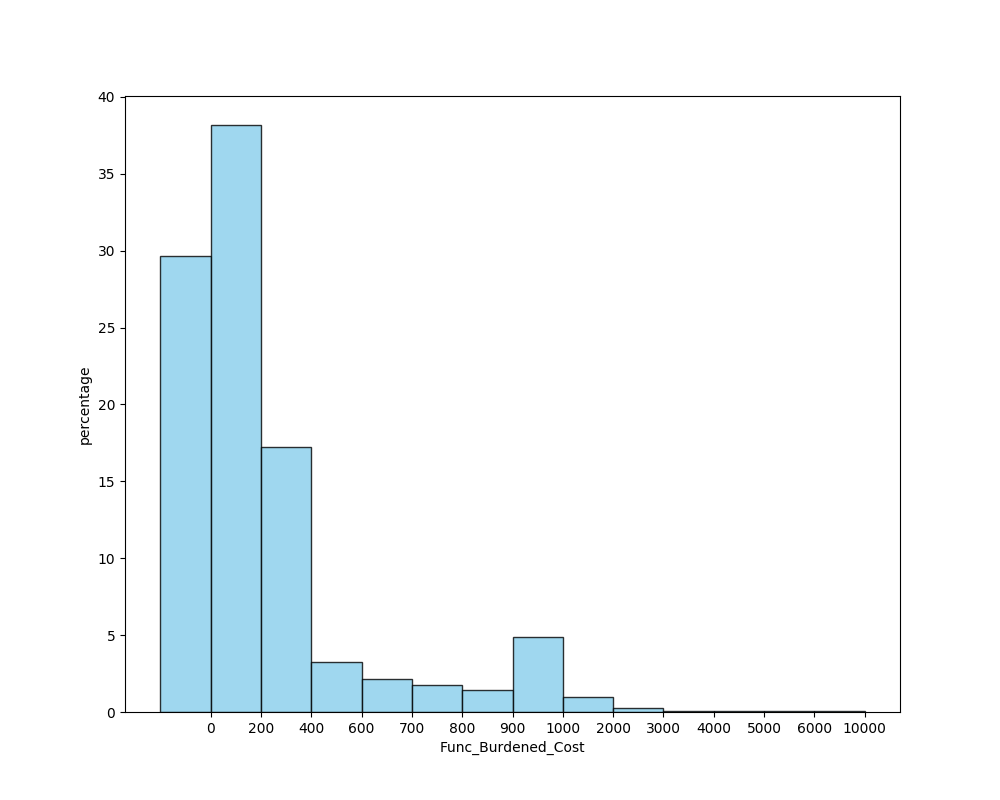

In [27]:
import matplotlib.pyplot as plt
import numpy as np
var = 'Func_Burdened_Cost'
plot_data = df.select(['Func_Burdened_Cost']).toPandas()
x= plot_data[var]

bins =[0,200,400,600,700,800,900,1000,2000,3000,4000,5000,6000,10000,25000]

hist, bin_edges = np.histogram(x,bins,weights=np.zeros_like(x) + 100. / x.size) # make the histogram

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black',color = 'skyblue')

# # Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
#labels =['{}k'.format(int(bins[i+1]/1000)) for i,j in enumerate(hist)]
labels =['{}'.format(bins[i+1]) for i,j in enumerate(hist)]
labels.insert(0,'0')
ax.set_xticklabels(labels)
#plt.text(-0.6, -1.4,'0')
plt.xlabel(var)
plt.ylabel('percentage')
disp= plt.show()
display(disp)

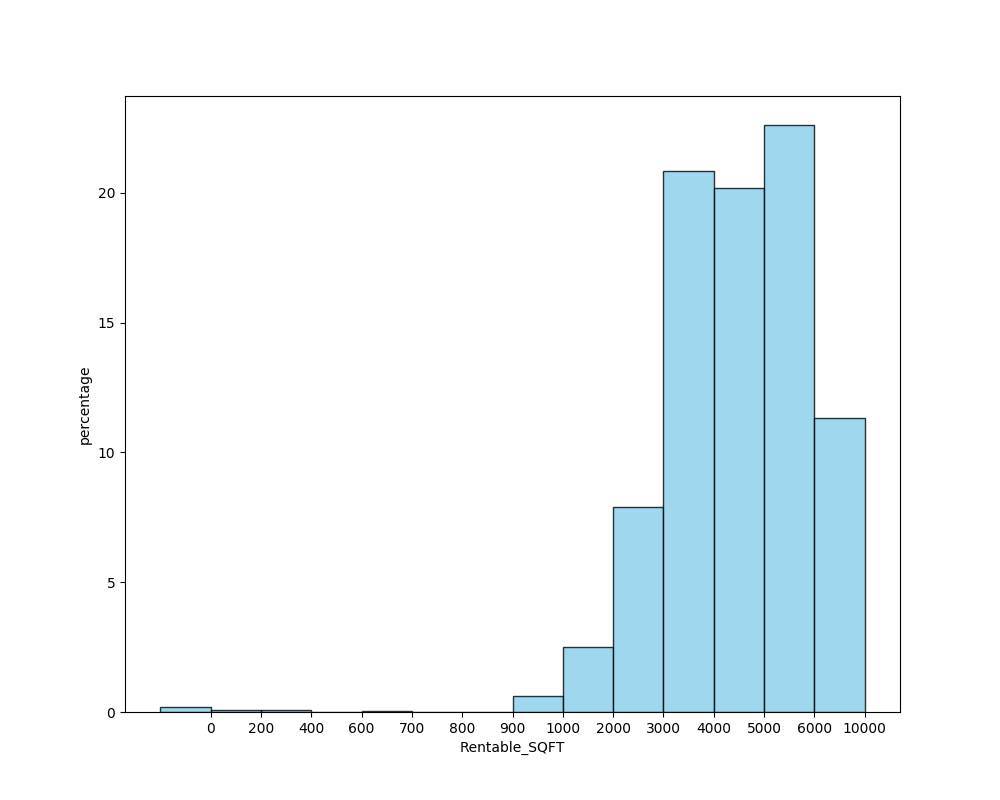

In [28]:
import numpy as np
var = 'Rentable_SQFT'
plot_data = df.select(['Rentable_SQFT']).toPandas()
x= plot_data[var]

bins =[0,200,400,600,700,800,900,1000,2000,3000,4000,5000,6000,10000,25000]

hist, bin_edges = np.histogram(x,bins,weights=np.zeros_like(x) + 100. / x.size) # make the histogram

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black',color = 'skyblue')

# # Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
#labels =['{}k'.format(int(bins[i+1]/1000)) for i,j in enumerate(hist)]
labels =['{}'.format(bins[i+1]) for i,j in enumerate(hist)]
labels.insert(0,'0')
ax.set_xticklabels(labels)
#plt.text(-0.6, -1.4,'0')
plt.xlabel(var)
plt.ylabel('percentage')
disp= plt.show()
display(disp)

In [29]:
from pyspark.mllib.stat import Statistics
import pandas as pd
num_cols = ['Rentable_SQFT', 'Func_Burdened_Cost','Work_Duration_Days','Creation_hour','Creation_day','Creation_week','Creation_Year','Creation_dayofweek','Creation_month','doc_lengths','Estimated_Time_Days']
corr_data = df.select(num_cols)

col_names = corr_data.columns
features = corr_data.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

print(corr_df.to_string())


Rentable_SQFT Func_Burdened_Cost Work_Duration_Days Creation_hour Creation_day Creation_week Creation_Year Creation_dayofweek Creation_month doc_lengths Estimated_Time_Days
Rentable_SQFT 1.000000 0.050892 -0.028636 0.040150 -0.032630 -0.000646 0.005142 -0.022754 0.001369 -0.029924 -0.055574
Func_Burdened_Cost 0.050892 1.000000 0.145782 0.028418 -0.016545 -0.003374 0.029346 -0.000811 -0.001895 0.010200 0.116669
Work_Duration_Days -0.028636 0.145782 1.000000 -0.277279 0.109324 0.012468 0.012225 0.021276 0.004253 -0.285632 0.770134
Creation_hour 0.040150 0.028418 -0.277279 1.000000 -0.253653 -0.006446 -0.022012 -0.035239 0.012524 0.587622 -0.425818
Creation_day -0.032630 -0.016545 0.109324 -0.253653 1.000000 0.092543 -0.019413 -0.010365 0.022394 -0.210355 0.165664
Creation_week -0.000646 -0.003374 0.012468 -0.006446 0.092543 1.000000 -0.133758 0.016726 0.987951 0.000174 0.004359
Creation_Year 0.005142 0.029346 0.012225 -0.022012 -0.019413 -0.133758 1.000000 -0.004768 -0.125418 0.022978 0.050619
Creation_dayofweek -0.022754 -0.000811 0.021276 -0.035239 -0.010365 0.016726 -0.004768 1.000000 0.025226 0.004524 0.018209
Creation_month 0.001369 -0.001895 0.004253 0.012524 0.022394 0.987951 -0.125418 0.025226 1.000000 0.018566 -0.008156
doc_lengths -0.029924 0.010200 -0.285632 0.587622 -0.210355 0.000174 0.022978 0.004524 0.018566 1.000000 -0.437109
Estimated_Time_Days -0.055574 0.116669 0.770134 -0.425818 0.165664 0.004359 0.050619 0.018209 -0.008156 -0.437109 1.000000

In [30]:
display(df.groupBy("Province").agg({"Func_Burdened_Cost":'Count'}))

Province count(Func_Burdened_Cost) NS 2237 NL 787 NT 51 QC 12528 BC 16388 MB 2583 ON 88406 SK 2467 AB 15433 PE 442 YT 182 NB 2270

In [31]:
display(df.groupBy("Province").agg({"Func_Burdened_Cost":'Sum'}))

Province sum(Func_Burdened_Cost) NS 810856.7699999996 NL 337909.64 NT 35146.98000000001 QC 5353884.450000009 BC 5185408.550000018 MB 975373.7200000006 ON 3.7930575279999524E7 SK 972375.9999999997 AB 5790233.239999998 PE 192173.38000000018 YT 68857.27 NB 879503.4299999995

In [32]:
display(spark.sql("SELECT distinct City,Region_Name from BGIS where Region_name !='ON GTA' and Province !='ON'"))

City Region_Name ST LEONARD EAST SASKATOON WEST VERMILION WEST HALIFAX CENTRAL CHARLOTTETOWN EAST WOODSTOCK EAST MONTREAL EAST ELK POINT WEST BURNABY WEST CHATEAUGUAY EAST ASSINIBOIA WEST LANGLEY CENTRAL MAPLE RIDGE WEST ST PAUL WEST ST. JEAN EAST MONTMARTRE WEST DEUX MONTAGNES CENTRAL CORONATION WEST WHISTLER WEST ESTEVAN WEST RED DEER WEST LAVAL EAST ALLAN WEST NEW MINAS EAST DAWSON CREEK WEST PARKSVILLE WEST WILLIAMS LAKE WEST PILOT MOUND WEST BEDFORD EAST NANAIMO WEST LETHBRIDGE WEST BOUCHERVILLE EAST BEACONSFIELD EAST SAINTE ROSE EAST SARDIS WEST BOISBRIAND EAST GRANBY EAST SUSSEX EAST QUALICUM BEACH WEST SIDNEY WEST RICHMOND CENTRAL DRUMMONDVILLE EAST BUCKINGHAM EAST CHARLESBOURG EAST VICTORIA WEST ABBOTSFORD WEST ST. JOHN'S EAST CANDIAC EAST SELKIRK WEST COTEAU DU LAC EAST NOTRE-DAME-DE-I'ILE-PERROT EAST ROSETOWN WEST KAMLOOPS WEST QUESNEL WEST CARDSTON WEST CHAMBLY EAST ST. HUBERT EAST TEULON WEST ROCANVILLE WEST TERREBONNE EAST TRURO EAST THE PAS WEST NORTH BATTLEFORD WEST SAINT-LAURENT EAST CAMPBELLTON EAST SWIFT CURRENT WEST TRACY EAST KELOWNA WEST STE FOY EAST LAKE COUNTRY WEST SAINTE-THERESE EAST SAINT JOHN EAST BOIS-DES-FILIONS EAST SAINT-JEROME EAST LLOYDMINSTER CENTRAL MONTREAL-NORD EAST SWAN RIVER WEST HIGH RIVER WEST BELOEIL EAST KYLE WEST COLD LAKE WEST CALGARY WEST CONCEPTION BAY EAST JASPER WEST KINDERSLEY WEST ST HYACINTHE EAST SOOKE WEST GRANDE PRAIRIE WEST CHETWYND WEST HALIFAX EAST DRAYTON VALLEY WEST DELSON EAST FORT SASKATCHEWAN WEST HANNA WEST CANMORE WEST YELLOWKNIFE WEST CRANBROOK WEST QUISPAMSIS EAST FREDERICTON EAST WEST KELOWNA WEST MAGOG EAST ROUYN EAST QUEBEC CITY EAST SPRUCE GROVE WEST UPPER TANTALLON EAST SHERWOOD PARK WEST AMHERST EAST WETASKIWIN WEST PREECEVILLE WEST ST. ALBERT WEST CAP ROUGE EAST SAINT-EUSTACHE EAST WOLSELEY WEST NEW GLASGOW EAST BARRHEAD WEST DUNCAN WEST CHESTERMERE WEST SAINT ROMUALD EAST PORT COQUITLAM WEST VAL D'OR EAST WEST VANCOUVER CENTRAL SYDNEY EAST CAMROSE WEST BROSSARD EAST COTE ST LUC EAST PRINCE GEORGE WEST EDMUNDSTON EAST MONTREAL CENTRAL VAUDREUIL-DORION EAST MARYSTOWN EAST SHERBROOKE EAST BRIDGEWATER EAST SUMMERSIDE EAST REGINA WEST BATHURST EAST MOUNT PEARL EAST EDMONTON WEST WINNIPEG WEST PIERREFONDS EAST ST. AUGUSTIN-DE-DESMAURES EAST MONCTON EAST VIMONT EAST COMOX WEST HIGH PRAIRIE WEST AIRDRIE WEST NORTH VANCOUVER WEST CHILLIWACK WEST BONNYVILLE WEST WINNIPEG CENTRAL ST ALBERT WEST GANDER EAST DARTMOUTH EAST VEGREVILLE WEST MEDICINE HAT WEST MISSION WEST SECHELT WEST WEYBURN WEST LEDUC WEST AYLMER EAST OROMOCTO EAST COQUITLAM WEST FORT MCMURRAY WEST STONY PLAIN WEST VANCOUVER WEST DELTA CENTRAL YARMOUTH EAST VERNON WEST SAINTE MARTHE SUR LE LAC EAST SOREL-TRACY EAST YORKTON WEST CORNER BROOK EAST LANGLEY WEST ALDERGROVE WEST LLOYDMINISTER WEST BEAUMONT WEST STONEWALL WEST LACHENAIE EAST PRINCE RUPERT WEST BRANDON WEST DAUPHIN WEST SAINT HUBERT EAST BLAINVILLE EAST MASCOUCHE EAST MAYERTHORPE WEST LUNENBURG EAST L'ASSOMPTION EAST OLDS WEST KIPLING WEST MARWAYNE CENTRAL GASPE EAST ST. SAUVEUR EAST HULL EAST ST LAURENT EAST VAL-BÉLAIR EAST REPENTIGNY EAST DELORAINE WEST MELFORT WEST TERRACE WEST PORTAGE LA PRAIRIE WEST PRINCE ALBERT WEST SACKVILLE EAST CARMAN WEST TSAWWASSEN WEST GATINEAU EAST VANCOUVER CENTRAL WHITEHORSE WEST PORT MOODY WEST KIRKLAND EAST POINTE CLAIRE EAST PEACE RIVER WEST LACOMBE WEST THOMPSON WEST OKOTOKS WEST ST JOHN'S EAST DOLLARD DES ORMEAU EAST WESTLOCK WEST STETTLER WEST REVELSTOKE WEST CALGARY CENTRAL RICHMOND WEST NEW WESTMINSTER WEST FORT ST JOHN WEST CAMPBELL RIVER WEST MIRAMICHI EAST ST LAMBERT EAST PENTICTON WEST OYEN WEST LANGENBURG WEST KENTVILLE EAST RIVERVIEW EAST LAFLECHE WEST MOOSE JAW WEST ST. HILAIRE EAST SALMON ARM WEST WEST VANCOUVER WEST LONGUEUIL EAST MALARTIC EAST ST HUBERT EAST STEINBACH WEST THREE HILLS WEST COCHRANE WEST PORT HAWKSBURY EAST LEVIS EAST DELTA WEST GRENFELL WEST TRAIL WEST COURTENAY WEST CHICOUTIMI EAST DIEPPE EAST FERNIE WEST GREENFIELD PARK EAST SURREY WEST WHITE ROCK WEST SQUAMISH WEST GRAV

In [33]:
from pyspark.sql import functions as f
#concatenate building id and building key
df = df.withColumn('BuildingID_Key', f.concat(df.Building_ID,f.lit('_'),df.Building_Key))
#concatenate city and province to make a unique combination (can think about combining region later but not yet)
df = df.withColumn('City_Province_Key', f.concat(df.City_up2,f.lit('_'),df.Province))
#when parent work order is NULL parentworknumber=workorder number
df = df.withColumn('Workorder_Parent', f.when(df.Parent_WorkOrderNbr == "NA",1).otherwise(0))
df = df.withColumn('Parent_WorkOrderNbr', f.when(df.Parent_WorkOrderNbr == "NA",df.WorkOrder_Nbr).otherwise(df.Parent_WorkOrderNbr))
#drop columns with negative work_duration_days
df = df.filter(df.Work_Duration_Days > 0)
df.show

Out[558]: <bound method DataFrame.show of DataFrame[Building_ID: string, Building_Key: string, City: string, LeaseInd: int, Property_Usage: string, Province: string, Region_Name: string, Rentable_SQFT: int, WorkOrder_Nbr: string, Parent_WorkOrderNbr: string, Description_Document: string, Resolution_Document: string, Func_Burdened_Cost: double, ServiceType_Cd: string, ServiceType_Name: string, BOMA_Sub_Category: string, Creation_Date: timestamp, Completion_Date: timestamp, TargetCompletion_Date: timestamp, Work_Duration_Days: double, Estimated_Time_Days: double, off_by_days: double, Vendor_Key: string, ServiceProvider_Class: string, ServiceProvider_Type: string, WorkOrderSource_Cd: string, WorkOrderStatus_Desc: string, WorkOrderType_Cd: string, WorkOrderType_Desc1: string, WorkOrder_Priority_Desc: string, City_up2: string, LeaseInd2: int, Work_Duration_Days_Rounded: int, off_by_days_Rounded: int, doc_lengths: int, TargetCompletion_Year: int, TargetCompletion_month: int, TargetCompletion_day: int, TargetCompletion_dayofweek: int, TargetCompletion_week: int, TargetCompletion_hour: int, Creation_Year: int, Creation_month: int, Creation_day: int, Creation_dayofweek: int, Creation_week: int, Creation_hour: int, BuildingID_Key: string, City_Province_Key: string, Workorder_Parent: int]>

In [34]:
#drop rows with Property_Usage =N/A
df = df.filter(df.Property_Usage != 'N/A')
#clean serviceProvider_type
df=df.withColumn("ServiceProvider_Type", f.when(df.ServiceProvider_Type=="GEN CONTRACTOR_NON PROJECT", "GEN CONTRACTOR_NONPROJECT").otherwise(df.ServiceProvider_Type))
df=df.withColumn("ServiceProvider_Type", f.when(df.ServiceProvider_Type=="DOORS & LOCKS", "DOORS AND LOCKS").otherwise(df.ServiceProvider_Type))
df=df.withColumn("ServiceProvider_Type", f.when(df.ServiceProvider_Type=="TECH OU", "TECH").otherwise(df.ServiceProvider_Type))
#categorize service provider type
df=df.withColumn('ServiceProviderType_Category',f.when((df['ServiceProvider_Type']=='LANDLORD')|(df['ServiceProvider_Type']=='N/A')|(df['ServiceProvider_Type']=='CLIENT'),'3rd PARTY LANDLORD').when((df['ServiceProvider_Type']=='TECH'),'BGIS EMPLOYEE').otherwise('BGIS TECHNICIAN'))

In [35]:
#categorize property_usage based on information from SME
df = df.withColumn('Property_Corporate',f.when((df.Property_Usage).like("%CORP%"),1).otherwise(0))
df = df.withColumn('Property_Retail',f.when((df.Property_Usage).like("%RET%"),1).otherwise(0))

In [36]:
#High Low cost classification
df = df.withColumn('Cost_Type', f.when(df.Func_Burdened_Cost <= 400,'Low').otherwise('High'))

In [37]:
#Drop BOMA Sub_Category since it is the same throughout (Repairs and Maintenance)
#Drop columns that specify anything to do with resolution, target variable etc.
#Drop City since its equal to City_up2
#Drop ServiceType_name since both ServiceType_Cd and name giving similar information 
#Drop WorkOrderType_Desc1 since it gives same information as WorkOrderType_Cd
df_r = df.drop("BOMA_Sub_Category", "Resolution_Document","Completion_date","Work_Duration_Days","off_by_days","off_by_days_rounded","Work_Duration_Days_Rounded","City","ServiceType_name","WorkOrderType_Desc1","Creation_Date","TargetCompletion_Date","Building_ID", "Building_Key","Province","City_up2","Func_Burdened_Cost")


In [38]:
df_r.columns

Out[563]: ['LeaseInd',
 'Property_Usage',
 'Region_Name',
 'Rentable_SQFT',
 'WorkOrder_Nbr',
 'Parent_WorkOrderNbr',
 'Description_Document',
 'ServiceType_Cd',
 'Estimated_Time_Days',
 'Vendor_Key',
 'ServiceProvider_Class',
 'ServiceProvider_Type',
 'WorkOrderSource_Cd',
 'WorkOrderStatus_Desc',
 'WorkOrderType_Cd',
 'WorkOrder_Priority_Desc',
 'LeaseInd2',
 'doc_lengths',
 'TargetCompletion_Year',
 'TargetCompletion_month',
 'TargetCompletion_day',
 'TargetCompletion_dayofweek',
 'TargetCompletion_week',
 'TargetCompletion_hour',
 'Creation_Year',
 'Creation_month',
 'Creation_day',
 'Creation_dayofweek',
 'Creation_week',
 'Creation_hour',
 'BuildingID_Key',
 'City_Province_Key',
 'Workorder_Parent',
 'ServiceProviderType_Category',
 'Property_Corporate',
 'Property_Retail',
 'Cost_Type']

In [39]:

from pyspark.sql.functions import udf

def tokenize(col):
  if col is None:
    return []
  return col.split()

tokenize_udf = udf(tokenize, ArrayType(StringType()))
df1 = df_r.withColumn("WordList", tokenize_udf(df_r.Description_Document))



In [40]:
# Remove special characters and partially scraped html

special_char_list=['<span','<br','\\','`','\"',"'",'*','_','{','}','[',']','(',')',';','@','^','&','>','#','+',':','-','_','=','|','>','<','~','.','!','$','/',',','?','%','0','1','2','3','4','5','6','7','8','9','the','they','not','and','please','name','that','be','are',""]

def remove_specialchar(col):
  result = []
  for word in col:
    tmp_word = word.lower()
    for special_char in special_char_list:
      tmp_word = tmp_word.replace(special_char, "")
    result.append(tmp_word)
  return result

remove_specialchar_udf = udf(remove_specialchar, ArrayType(StringType()))
df2 = df1.withColumn("WordListCleaned", remove_specialchar_udf(df1.WordList))

In [41]:
# Remove stop words

from stop_words import get_stop_words

stop_words = get_stop_words('en')
remove_stopword_udf = udf(lambda col: [w for w in col if not (w in stop_words)], ArrayType(StringType()))
df3 = df2.withColumn("WordListCleaned", remove_stopword_udf(df2.WordListCleaned))

In [42]:
our_special_word = ['thf','', 'Ii', 'thanks', 'un', 'advised', 'rÃ©pr', 'ne', 'will', 'qui', 'ft', 'tf', 'can', 'pa', 'tx', 'el', 'y', 'est', 'il', 'hle', 're', 'tu', 'ou', 'hr', 'et', 'y', 'svp', 'wo', 'fm', 'b', 'y', 't', 'mf', 'le', 'mw', 'bh', 'de', 're', 'pm', 'la']

remove_stopword_udf = udf(lambda col: [w for w in col if not (w in our_special_word)], ArrayType(StringType()))
df3 = df3.withColumn("WordListCleaned", remove_stopword_udf(df3.WordListCleaned))
display(df3)

LeaseInd Property_Usage Region_Name Rentable_SQFT WorkOrder_Nbr Parent_WorkOrderNbr Description_Document ServiceType_Cd Estimated_Time_Days Vendor_Key ServiceProvider_Class ServiceProvider_Type WorkOrderSource_Cd WorkOrderStatus_Desc WorkOrderType_Cd WorkOrder_Priority_Desc LeaseInd2 doc_lengths TargetCompletion_Year TargetCompletion_month TargetCompletion_day TargetCompletion_dayofweek TargetCompletion_week TargetCompletion_hour Creation_Year Creation_month Creation_day Creation_dayofweek Creation_week Creation_hour BuildingID_Key City_Province_Key Workorder_Parent ServiceProviderType_Category Property_Corporate Property_Retail Cost_Type WordList WordListCleaned 0 RET_MIXED USE CENTRAL 15785 ClientQ6906722 ClientQ6906722 Please check the heating system for Collin and Name 's office. They are finding it too cold although it has been adjusted. All other areas are fine. Thank you. Name Hrs: M-F 8:30-4:30. M26 10.17965278 0 LANDLORD LANDLORD RealHelp COMPLETE SR ROUTINE 0 18 2016 2 29 2 9 19 2016 2 19 6 7 15 Q1068_43628 RICHMOND_BC 1 3rd PARTY LANDLORD 0 1 High List(Please, check, the, heating, system, for, Collin, and, Name, 's, office., They, are, finding, it, too, cold, although, it, has, been, adjusted., All, other, areas, are, fine., Thank, you., Name, Hrs:, M-F, 8:30-4:30.) List(check, heating, system, collin, s, office, finding, cold, although, en, adjusted, fine, thank, hrs) 1 RET_MIXED USE ON WEST 4196 ClientQ8139533 ClientQ8139533 Pease attend to replace 1 burnt out light bulb and client is not sure what the light it is. Name believes that the sensor is not working. Name height is standard. BH; M_W 9-6 THF 9-8 SA- 9-4 M40 0.994849537 0 LANDLORD FM RealHelp COMPLETE SR URGENT - CLIENT REQUESTED 1 27 2018 7 28 7 30 10 2018 7 27 6 30 10 Q0102_42634 ANCASTER_ON 1 BGIS TECHNICIAN 0 1 Low List(Pease, attend, to, replace, 1, burnt, out, light, bulb, and, client, is, not, sure, what, the, light, it, is., Name, believes, that, the, sensor, is, not, working., Name, height, is, standard., BH;, M_W, 9-6, THF, 9-8, SA-, 9-4) List(pease, attend, replace, burnt, light, bulb, client, sure, light, lieves, sensor, working, height, stard, sa) 0 CORP TOR CORE 351219 ClientQ2217644 ClientQ2217644 No power source to the desk where the client is sitting today. The client can look for another desk until someone attends. M36 0.164398148 0 LANDLORD LANDLORD RealHelp CLOSED SR EMERGENCY - CLIENT REQUESTED 0 14 2014 4 8 3 15 13 2014 4 8 3 15 9 Q0101_44033 TORONTO_ON 1 3rd PARTY LANDLORD 1 0 Low List(No, power, source, to, the, desk, where, the, client, is, sitting, today., The, client, can, look, for, another, desk, until, someone, attends.) List(power, source, desk, client, sitting, today, client, look, anor, desk, someone, attends) 0 CORP TOR CORE 839823 ClientQ3364919 ClientQ3364919 Please investigate / repair the fluorescent tube lights on the floor as the client advises that there are 4 panels of lights that are out. They all went out at the same time and they are in the same row. Two are above the client's desk. M36 0.164293981 0 LANDLORD LANDLORD RealHelp CLOSED SR EMERGENCY - CLIENT REQUESTED 0 25 2015 2 4 4 6 13 2015 2 4 4 6 9 Q0105_44037 TORONTO_ON 1 3rd PARTY LANDLORD 1 0 Low List(Please, investigate, /, repair, the, fluorescent, tube, lights, on, the, floor, as, the, client, advises, that, there, are, 4, panels, of, lights, that, are, out., They, all, went, out, at, the, same, time, and, they, are, in, the, same, row., Two, are, above, the, client's, desk.) List(investigate, repair, fluorescent, lights, floor, client, advises, panels, lights, went, time, row, two, clients, desk) 0 CORP TOR CORE 839823 ClientQ3036779 ClientQ3036779 *Related to 13005483*-Please attend and assess all the lights in the Name and Macdonald room. Please replace those that are burnt out and mark those that are ballast issues. Please see client at reception to advise if there M36 0.163819444 0 LANDLORD LANDLORD RealHelp CLOSED SR EMERGENCY - CLIENT REQUESTED 0 

In [43]:
#df_pds = df.toPandas()

#import seaborn as sns
#sns.set(style="ticks")

#sns.pairplot(df_pds)
#disp1=plt.show()
#display(disp1)

In [44]:
# Lemmatizing
import nltk
from nltk.stem import WordNetLemmatizer
def lemmatizationFunct(x):
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    finalLem = [lemmatizer.lemmatize(s) for s in x]
    return finalLem

lemmatizer_udf = udf(lemmatizationFunct, ArrayType(StringType()))
df5 = df3.withColumn("WordListCleaned", lemmatizer_udf(df3.WordListCleaned))
display(df5)


LeaseInd Property_Usage Region_Name Rentable_SQFT WorkOrder_Nbr Parent_WorkOrderNbr Description_Document ServiceType_Cd Estimated_Time_Days Vendor_Key ServiceProvider_Class ServiceProvider_Type WorkOrderSource_Cd WorkOrderStatus_Desc WorkOrderType_Cd WorkOrder_Priority_Desc LeaseInd2 doc_lengths TargetCompletion_Year TargetCompletion_month TargetCompletion_day TargetCompletion_dayofweek TargetCompletion_week TargetCompletion_hour Creation_Year Creation_month Creation_day Creation_dayofweek Creation_week Creation_hour BuildingID_Key City_Province_Key Workorder_Parent ServiceProviderType_Category Property_Corporate Property_Retail Cost_Type WordList WordListCleaned 0 RET_MIXED USE CENTRAL 15785 ClientQ6906722 ClientQ6906722 Please check the heating system for Collin and Name 's office. They are finding it too cold although it has been adjusted. All other areas are fine. Thank you. Name Hrs: M-F 8:30-4:30. M26 10.17965278 0 LANDLORD LANDLORD RealHelp COMPLETE SR ROUTINE 0 18 2016 2 29 2 9 19 2016 2 19 6 7 15 Q1068_43628 RICHMOND_BC 1 3rd PARTY LANDLORD 0 1 High List(Please, check, the, heating, system, for, Collin, and, Name, 's, office., They, are, finding, it, too, cold, although, it, has, been, adjusted., All, other, areas, are, fine., Thank, you., Name, Hrs:, M-F, 8:30-4:30.) List(check, heating, system, collin, s, office, finding, cold, although, en, adjusted, fine, thank, hr) 1 RET_MIXED USE ON WEST 4196 ClientQ8139533 ClientQ8139533 Pease attend to replace 1 burnt out light bulb and client is not sure what the light it is. Name believes that the sensor is not working. Name height is standard. BH; M_W 9-6 THF 9-8 SA- 9-4 M40 0.994849537 0 LANDLORD FM RealHelp COMPLETE SR URGENT - CLIENT REQUESTED 1 27 2018 7 28 7 30 10 2018 7 27 6 30 10 Q0102_42634 ANCASTER_ON 1 BGIS TECHNICIAN 0 1 Low List(Pease, attend, to, replace, 1, burnt, out, light, bulb, and, client, is, not, sure, what, the, light, it, is., Name, believes, that, the, sensor, is, not, working., Name, height, is, standard., BH;, M_W, 9-6, THF, 9-8, SA-, 9-4) List(pea, attend, replace, burnt, light, bulb, client, sure, light, lieves, sensor, working, height, stard, sa) 0 CORP TOR CORE 351219 ClientQ2217644 ClientQ2217644 No power source to the desk where the client is sitting today. The client can look for another desk until someone attends. M36 0.164398148 0 LANDLORD LANDLORD RealHelp CLOSED SR EMERGENCY - CLIENT REQUESTED 0 14 2014 4 8 3 15 13 2014 4 8 3 15 9 Q0101_44033 TORONTO_ON 1 3rd PARTY LANDLORD 1 0 Low List(No, power, source, to, the, desk, where, the, client, is, sitting, today., The, client, can, look, for, another, desk, until, someone, attends.) List(power, source, desk, client, sitting, today, client, look, anor, desk, someone, attends) 0 CORP TOR CORE 839823 ClientQ3364919 ClientQ3364919 Please investigate / repair the fluorescent tube lights on the floor as the client advises that there are 4 panels of lights that are out. They all went out at the same time and they are in the same row. Two are above the client's desk. M36 0.164293981 0 LANDLORD LANDLORD RealHelp CLOSED SR EMERGENCY - CLIENT REQUESTED 0 25 2015 2 4 4 6 13 2015 2 4 4 6 9 Q0105_44037 TORONTO_ON 1 3rd PARTY LANDLORD 1 0 Low List(Please, investigate, /, repair, the, fluorescent, tube, lights, on, the, floor, as, the, client, advises, that, there, are, 4, panels, of, lights, that, are, out., They, all, went, out, at, the, same, time, and, they, are, in, the, same, row., Two, are, above, the, client's, desk.) List(investigate, repair, fluorescent, light, floor, client, advises, panel, light, went, time, row, two, client, desk) 0 CORP TOR CORE 839823 ClientQ3036779 ClientQ3036779 *Related to 13005483*-Please attend and assess all the lights in the Name and Macdonald room. Please replace those that are burnt out and mark those that are ballast issues. Please see client at reception to advise if there M36 0.163819444 0 LANDLORD LANDLORD RealHelp CLOSED SR EMERGENCY - CLIENT REQUESTED 0 20 2014

In [45]:
#n-grams and skip-grams
from pyspark.ml.feature import NGram
from pyspark.sql.functions import array_union

ngram = NGram(n = 2, inputCol="WordList", outputCol="bigram")
df6 = ngram.transform(df5)
df7 = df6.withColumn("ngrams", array_union(df5.WordList, df6.bigram))
display(df7)

LeaseInd Property_Usage Region_Name Rentable_SQFT WorkOrder_Nbr Parent_WorkOrderNbr Description_Document ServiceType_Cd Estimated_Time_Days Vendor_Key ServiceProvider_Class ServiceProvider_Type WorkOrderSource_Cd WorkOrderStatus_Desc WorkOrderType_Cd WorkOrder_Priority_Desc LeaseInd2 doc_lengths TargetCompletion_Year TargetCompletion_month TargetCompletion_day TargetCompletion_dayofweek TargetCompletion_week TargetCompletion_hour Creation_Year Creation_month Creation_day Creation_dayofweek Creation_week Creation_hour BuildingID_Key City_Province_Key Workorder_Parent ServiceProviderType_Category Property_Corporate Property_Retail Cost_Type WordList WordListCleaned bigram ngrams 0 RET_MIXED USE CENTRAL 15785 ClientQ6906722 ClientQ6906722 Please check the heating system for Collin and Name 's office. They are finding it too cold although it has been adjusted. All other areas are fine. Thank you. Name Hrs: M-F 8:30-4:30. M26 10.17965278 0 LANDLORD LANDLORD RealHelp COMPLETE SR ROUTINE 0 18 2016 2 29 2 9 19 2016 2 19 6 7 15 Q1068_43628 RICHMOND_BC 1 3rd PARTY LANDLORD 0 1 High List(Please, check, the, heating, system, for, Collin, and, Name, 's, office., They, are, finding, it, too, cold, although, it, has, been, adjusted., All, other, areas, are, fine., Thank, you., Name, Hrs:, M-F, 8:30-4:30.) List(check, heating, system, collin, s, office, finding, cold, although, en, adjusted, fine, thank, hr) List(Please check, check the, the heating, heating system, system for, for Collin, Collin and, and Name, Name 's, 's office., office. They, They are, are finding, finding it, it too, too cold, cold although, although it, it has, has been, been adjusted., adjusted. All, All other, other areas, areas are, are fine., fine. Thank, Thank you., you. Name, Name Hrs:, Hrs: M-F, M-F 8:30-4:30.) List(Please, check, the, heating, system, for, Collin, and, Name, 's, office., They, are, finding, it, too, cold, although, has, been, adjusted., All, other, areas, fine., Thank, you., Hrs:, M-F, 8:30-4:30., Please check, check the, the heating, heating system, system for, for Collin, Collin and, and Name, Name 's, 's office., office. They, They are, are finding, finding it, it too, too cold, cold although, although it, it has, has been, been adjusted., adjusted. All, All other, other areas, areas are, are fine., fine. Thank, Thank you., you. Name, Name Hrs:, Hrs: M-F, M-F 8:30-4:30.) 1 RET_MIXED USE ON WEST 4196 ClientQ8139533 ClientQ8139533 Pease attend to replace 1 burnt out light bulb and client is not sure what the light it is. Name believes that the sensor is not working. Name height is standard. BH; M_W 9-6 THF 9-8 SA- 9-4 M40 0.994849537 0 LANDLORD FM RealHelp COMPLETE SR URGENT - CLIENT REQUESTED 1 27 2018 7 28 7 30 10 2018 7 27 6 30 10 Q0102_42634 ANCASTER_ON 1 BGIS TECHNICIAN 0 1 Low List(Pease, attend, to, replace, 1, burnt, out, light, bulb, and, client, is, not, sure, what, the, light, it, is., Name, believes, that, the, sensor, is, not, working., Name, height, is, standard., BH;, M_W, 9-6, THF, 9-8, SA-, 9-4) List(pea, attend, replace, burnt, light, bulb, client, sure, light, lieves, sensor, working, height, stard, sa) List(Pease attend, attend to, to replace, replace 1, 1 burnt, burnt out, out light, light bulb, bulb and, and client, client is, is not, not sure, sure what, what the, the light, light it, it is., is. Name, Name believes, believes that, that the, the sensor, sensor is, is not, not working., working. Name, Name height, height is, is standard., standard. BH;, BH; M_W, M_W 9-6, 9-6 THF, THF 9-8, 9-8 SA-, SA- 9-4) List(Pease, attend, to, replace, 1, burnt, out, light, bulb, and, client, is, not, sure, what, the, it, is., Name, believes, that, sensor, working., height, standard., BH;, M_W, 9-6, THF, 9-8, SA-, 9-4, Pease attend, attend to, to replace, replace 1, 1 burnt, burnt out, out light, light bulb, bulb and, and client, client is, is not, not sure, sure what, what the, the light, light it, it is., is. Name, Name believes, belie

In [46]:
# Getting tf-idf values for 1-2grams

from pyspark.ml.feature import CountVectorizer, IDF

interpret_tfidf = df7.select('*')

tf = CountVectorizer(inputCol="ngrams", outputCol='TF', minDF=0.2, maxDF=0.5, vocabSize=2**12)
tf_model = tf.fit(interpret_tfidf)
tf_transformed = tf_model.transform(interpret_tfidf)
idf = IDF(minDocFreq=3, inputCol="TF", outputCol="TF-IDF")
idfModel = idf.fit(tf_transformed)
interpret_tfidf = idfModel.transform(tf_transformed)

In [47]:
# Getting tf-idf values for words
from pyspark.ml.feature import CountVectorizer, IDF

interpret_tfidf1 = interpret_tfidf.select('*')

tf3 = CountVectorizer(inputCol="WordListCleaned", outputCol='TF_words', minDF=0.2, maxDF= 0.5, vocabSize=2**12)
tf_model2 = tf3.fit(interpret_tfidf1)
tf_transformed1 = tf_model2.transform(interpret_tfidf1)
idf = IDF(minDocFreq=3, inputCol="TF_words", outputCol="TF-IDF_words")
idfModel1 = idf.fit(tf_transformed1)
df9 = idfModel1.transform(tf_transformed1)

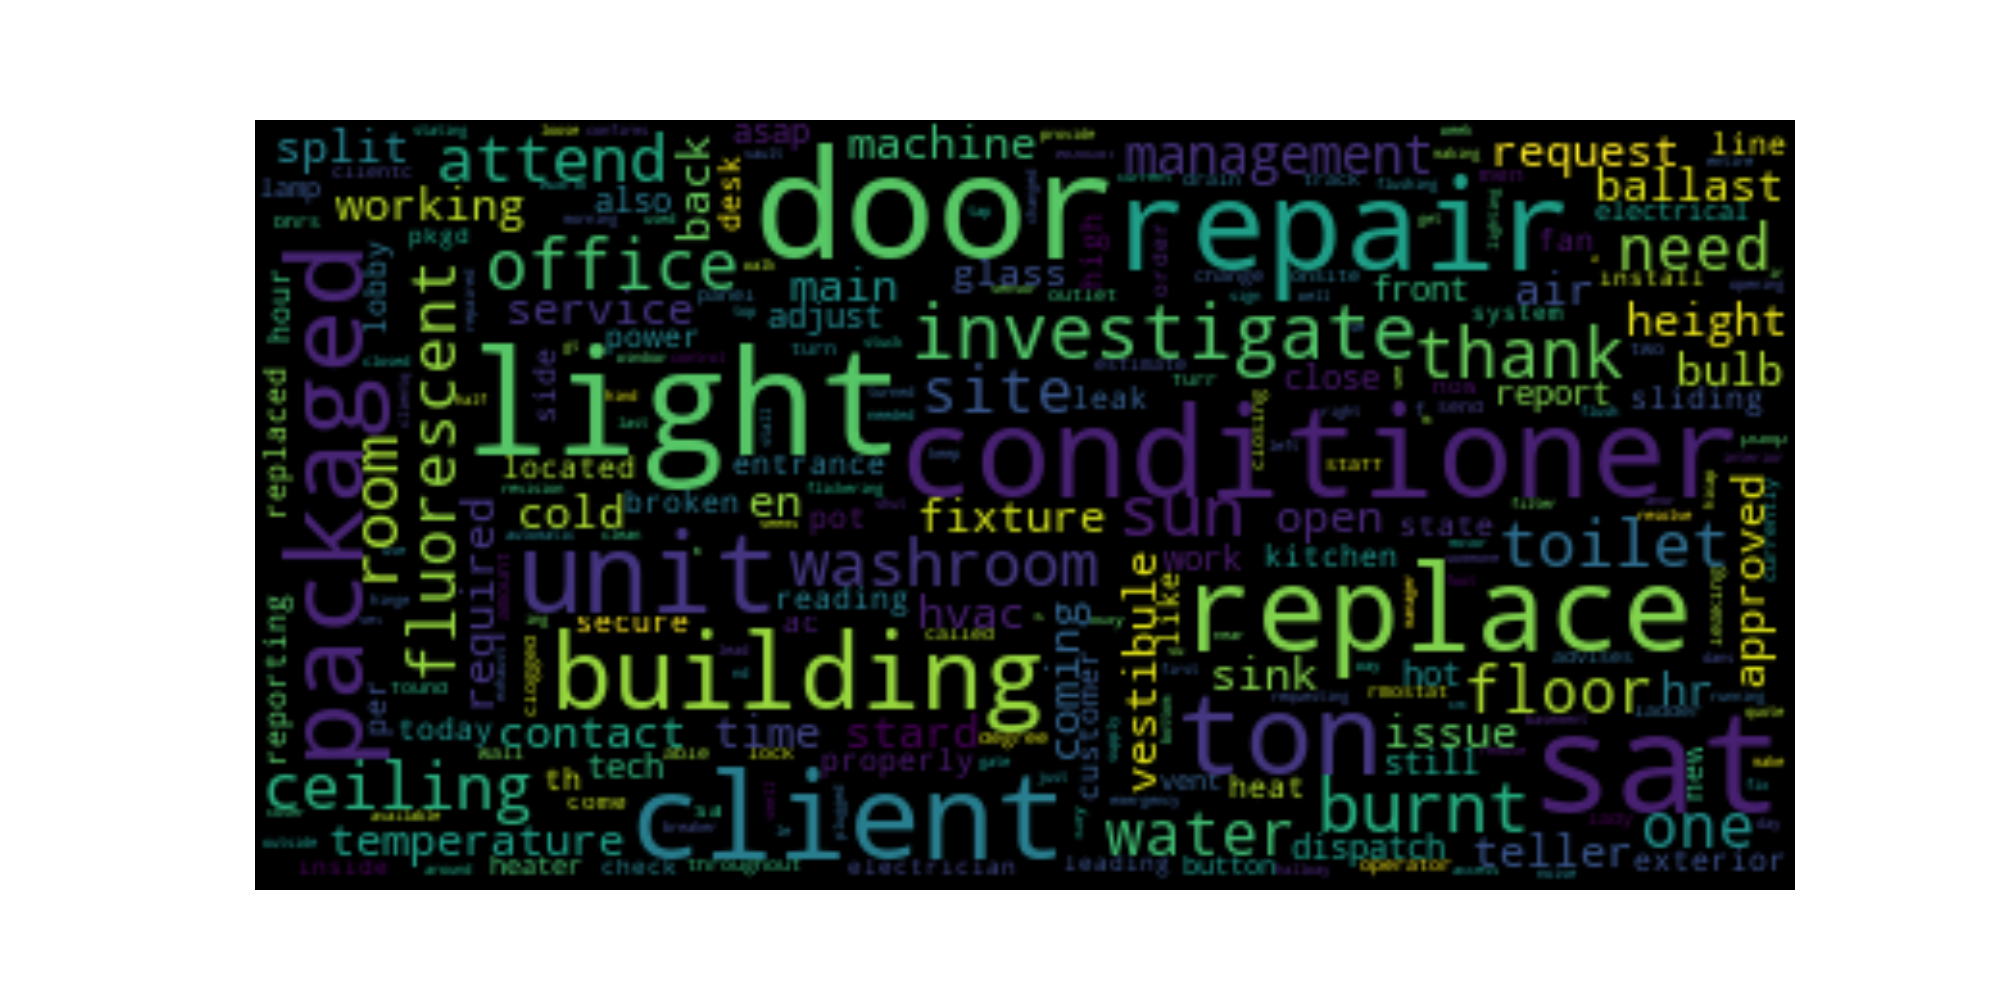

In [48]:
#Word Clouds

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS

stopwords = set(stopwords.words("english"))
stopwords.add("said")

WL=df9.select("WordListCleaned").rdd.flatMap(lambda x: x).collect()

WordsBag = []
for word in WL:
    WordsBag += word

#str1 = ''.join(WordsBag)

from collections import Counter

count1 = Counter(WordsBag)
print(count1)

from wordcloud import WordCloud

wordcloud = WordCloud( background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=40, 
                           contour_width=5,
                          random_state=42)


wordcloud.generate_from_frequencies(frequencies=count1)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
display()


# wc = WordCloud(background_color="white", max_words=2000,stopwords=stopwords, contour_width=3, contour_color='steelblue')

# wc.generate(str1)

# plt.figure(figsize=(20,10),facecolor='k')
# plt.imshow(wc)
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()
# plt.savefig('wordclouds.png',facecolor='k')
# display()

In [49]:
df_pds = df9.toPandas()

In [50]:
import re # We clean text using regex
import csv # To read the csv
from collections import defaultdict # For accumlating values
from nltk.corpus import stopwords # To remove stopwords
from gensim import corpora # To create corpus and dictionary for the LDA model
from gensim.models import LdaModel # To use the LDA model
import pyLDAvis.gensim # To visualise LDA model effectively
import pandas as pd



In [51]:
frequency = defaultdict(int)
for text in df_pds['WordListCleaned']:
    for token in text:
         frequency[token] += 1

df_pds['WordListCleaned1_LDA'] = [[token for token in text if frequency[token] > 1] for text in df_pds['WordListCleaned']]

In [52]:
#takes 30 minutes to run
import gensim
from gensim.models import LdaModel # To use the LDA model
# # Create Dictionary
id2word = corpora.Dictionary(df_pds['WordListCleaned1_LDA'])

# # Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df_pds['WordListCleaned1_LDA']]

# # Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)



In [53]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_pds['WordListCleaned'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity: -7.113918455581414

Coherence Score: 0.5637442111245091

In [54]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [55]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df_pds['WordListCleaned'], start=2, limit=40, step=6)


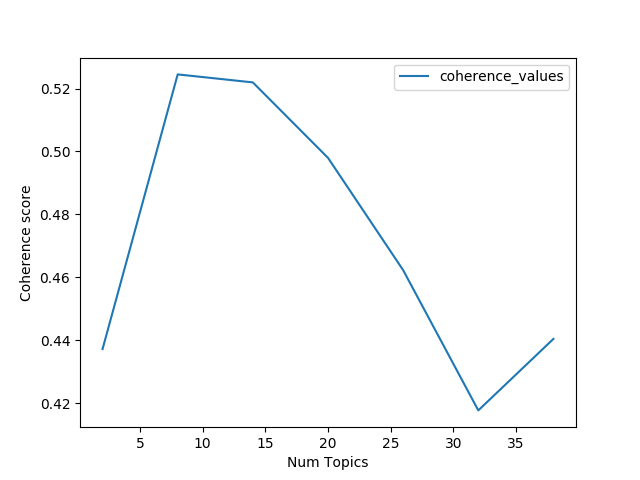

In [56]:
# Show graph

fig, ax = plt.subplots()

limit=40; start=2; step=6;
xre = range(start, limit, step)
ax = plt.plot(xre, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(["coherence_values"], loc='best')
display(fig)

In [57]:
dictionary = corpora.Dictionary(df_pds['WordListCleaned1_LDA'])
print(dictionary)

corpus = [dictionary.doc2bow(text) for text in df_pds['WordListCleaned1_LDA']]

Dictionary(13522 unique tokens: ['adjusted', 'although', 'check', 'cold', 'collin']...)

In [58]:
#takes 10 minutes to run
NUM_TOPICS = 8 # Based on Coherence Plot 
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)#This might take some time.

In [59]:
print(lda_model.print_topics())

[(0, '0.143*"door" + 0.035*"repair" + 0.025*"open" + 0.020*"side" + 0.018*"glass" + 0.017*"button" + 0.017*"vestibule" + 0.016*"close" + 0.015*"approved" + 0.014*"operator"'), (1, '0.046*"porte" + 0.022*"pour" + 0.020*"pa" + 0.019*"répr" + 0.017*"car" + 0.016*"merci" + 0.016*"toilette" + 0.015*"dans" + 0.014*"de" + 0.014*"au"'), (2, '0.107*"light" + 0.051*"replace" + 0.050*"burnt" + 0.027*"pot" + 0.026*"thank" + 0.025*"ceiling" + 0.022*"sat" + 0.021*"height" + 0.021*"stard" + 0.021*"client"'), (3, '0.038*"client" + 0.021*"building" + 0.020*"floor" + 0.017*"th" + 0.017*"investigate" + 0.014*"attend" + 0.014*"issue" + 0.013*"room" + 0.013*"service" + 0.013*"hvac"')]

In [60]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=df_pds['WordListCleaned1_LDA']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=df_pds['WordListCleaned1_LDA'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No 
 Dominant_Topic 
 Topic_Perc_Contrib 
 Keywords 
 Text 
 
 
 
 
 0 
 0 
 3.0 
 0.7142 
 client, building, floor, th, investigate, atte... 
 [check, heating, system, collin, s, office, fi... 
 
 
 1 
 1 
 2.0 
 0.6770 
 light, replace, burnt, pot, thank, ceiling, sa... 
 [pea, attend, replace, burnt, light, bulb, cli... 
 
 
 2 
 2 
 3.0 
 0.6363 
 client, building, floor, th, investigate, atte... 
 [power, source, desk, client, sitting, today, ... 
 
 
 3 
 3 
 2.0 
 0.7493 
 light, replace, burnt, pot, thank, ceiling, sa... 
 [investigate, repair, fluorescent, light, floo... 
 
 
 4 
 4 
 2.0 
 0.5483 
 light, replace, burnt, pot, thank, ceiling, sa... 
 [related, attend, ass, light, macdonald, room,... 
 
 
 5 
 5 
 3.0 
 0.8879 
 client, building, floor, th, investigate, atte... 
 [team, office, late, tonight, kindly, leave, h... 
 
 
 6 
 6 
 2.0 
 0.7024 
 light, replace, burnt, pot, thank, ceiling, sa... 
 [repair, ballast, workstation, aa, client, tec... 
 
 
 7 
 7 
 3.0 
 0.8116 
 client, building, floor, th, investigate, atte... 
 [hour, hvac, july] 
 
 
 8 
 8 
 3.0 
 0.8740 
 client, building, floor, th, investigate, atte... 
 [work, order, hour, hvac, june] 
 
 
 9 
 9 
 3.0 
 0.8746 
 client, building, floor, th, investigate, atte... 
 [billing, purpose, hvac, hour, nov]

In [61]:
display(df_dominant_topic)

Document_No Dominant_Topic Topic_Perc_Contrib Keywords Text 0 3.0 0.7142000198364258 client, building, floor, th, investigate, attend, issue, room, service, hvac List(check, heating, system, collin, s, office, finding, cold, although, en, adjusted, fine, thank, hr) 1 2.0 0.6769999861717224 light, replace, burnt, pot, thank, ceiling, sat, height, stard, client List(pea, attend, replace, burnt, light, bulb, client, sure, light, lieves, sensor, working, height, stard, sa) 2 3.0 0.6363000273704529 client, building, floor, th, investigate, attend, issue, room, service, hvac List(power, source, desk, client, sitting, today, client, look, anor, desk, someone, attends) 3 2.0 0.7493000030517578 light, replace, burnt, pot, thank, ceiling, sat, height, stard, client List(investigate, repair, fluorescent, light, floor, client, advises, panel, light, went, time, row, two, client, desk) 4 2.0 0.54830002784729 light, replace, burnt, pot, thank, ceiling, sat, height, stard, client List(related, attend, ass, light, macdonald, room, replace, burnt, mark, ballast, issue, see, client, reception, advise) 5 3.0 0.8878999948501587 client, building, floor, th, investigate, attend, issue, room, service, hvac List(team, office, late, tonight, kindly, leave, heating, located, ey, tower, th, floor, southwest, corner, leave, saturday, march) 6 2.0 0.7024000287055969 light, replace, burnt, pot, thank, ceiling, sat, height, stard, client List(repair, ballast, workstation, aa, client, technician, changing, light, ballast, need, repaired, florescent, light, bulb, currently) 7 3.0 0.8116000294685364 client, building, floor, th, investigate, attend, issue, room, service, hvac List(hour, hvac, july) 8 3.0 0.8740000128746033 client, building, floor, th, investigate, attend, issue, room, service, hvac List(work, order, hour, hvac, june) 9 3.0 0.8745999932289124 client, building, floor, th, investigate, attend, issue, room, service, hvac List(billing, purpose, hvac, hour, nov) 10 3.0 0.8740000128746033 client, building, floor, th, investigate, attend, issue, room, service, hvac List(work, order, hour, hvac, may) 11 3.0 0.8687000274658203 client, building, floor, th, investigate, attend, issue, room, service, hvac List(requesting, ac, left, entire, th, floor, sunday, octor, th, monday, octor, th, thank) 12 3.0 0.8745999932289124 client, building, floor, th, investigate, attend, issue, room, service, hvac List(billing, purpose, hvac, hour, nov) 13 3.0 0.9369999766349792 client, building, floor, th, investigate, attend, issue, room, service, hvac List(like, heating, feb, th, sunday, monday, feb, th, family, day, working) 14 3.0 0.7328000068664551 client, building, floor, th, investigate, attend, issue, room, service, hvac List(turn, hvac, friday, th, ampm, contact, client, confirm, service, hr) 15 3.0 0.6891999840736389 client, building, floor, th, investigate, attend, issue, room, service, hvac List(east, corner, tower, th, floor, require, light, vent, heat, weekend, saturday, octor, st, sunday, novemr, st, cost, center) 16 2.0 0.548799991607666 light, replace, burnt, pot, thank, ceiling, sat, height, stard, client List(repair, light, attached, cabinet, iced, flickering, morning, looked, closer, found, one, contact, end, fluorescent, bulb, broken, housing, light) 17 2.0 0.960099995136261 light, replace, burnt, pot, thank, ceiling, sat, height, stard, client List(investigate, replace, approximately, fluorescent, light, burnt, burn, time, regular, ceiling, height, contact, client, site, exact, direction, hr, monfri) 18 0.0 0.8889999985694885 door, repair, open, side, glass, button, vestibule, close, approved, operator List(revision, k, button, south, side, lobby, door, secure, push, exit, button, fallen, door, exit, suite) 19 3.0 0.5101000070571899 client, building, floor, th, investigate, attend, issue, room, service, hvac List(revision, jd, march, contact, site, service, en, complete, send, electrician, check, flickering, fluorescent, light, flickering) 20 3.0 0.6360

In [62]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 8)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

Dominant_Topic 
 Topic_Keywords 
 Num_Documents 
 Perc_Documents 
 
 
 
 
 0.0 
 3.0 
 client, building, floor, th, investigate, atte... 
 31352.0 
 0.219573 
 
 
 1.0 
 2.0 
 light, replace, burnt, pot, thank, ceiling, sa... 
 35552.0 
 0.248988 
 
 
 2.0 
 3.0 
 client, building, floor, th, investigate, atte... 
 40688.0 
 0.284958 
 
 
 3.0 
 2.0 
 light, replace, burnt, pot, thank, ceiling, sa... 
 35194.0 
 0.246481 
 
 
 4.0 
 2.0 
 light, replace, burnt, pot, thank, ceiling, sa... 
 NaN 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 142781.0 
 0.0 
 door, repair, open, side, glass, button, vesti... 
 NaN 
 NaN 
 
 
 142782.0 
 0.0 
 door, repair, open, side, glass, button, vesti... 
 NaN 
 NaN 
 
 
 142783.0 
 0.0 
 door, repair, open, side, glass, button, vesti... 
 NaN 
 NaN 
 
 
 142784.0 
 0.0 
 door, repair, open, side, glass, button, vesti... 
 NaN 
 NaN 
 
 
 142785.0 
 3.0 
 client, building, floor, th, investigate, atte... 
 NaN 
 NaN 
 
 
 
 142786 rows × 4 columns

In [63]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)

(0, '0.051*"approved" + 0.047*"hvac" + 0.039*"air" + 0.032*"work" + 0.025*"order" + 0.022*"amount" + 0.022*"estimate" + 0.020*"lock" + 0.020*"replace" + 0.016*"install"')
(1, '0.048*"management" + 0.035*"request" + 0.028*"ballast" + 0.028*"replace" + 0.020*"change" + 0.020*"fixture" + 0.018*"dispatch" + 0.016*"light" + 0.016*"room" + 0.016*"lamp"')
(2, '0.032*"th" + 0.029*"floor" + 0.027*"room" + 0.026*"site" + 0.023*"pump" + 0.023*"check" + 0.016*"tech" + 0.015*"sensor" + 0.014*"ac" + 0.012*"fix"')
(3, '0.130*"light" + 0.063*"replace" + 0.061*"burnt" + 0.040*"ceiling" + 0.028*"fluorescent" + 0.028*"sat" + 0.027*"height" + 0.024*"stard" + 0.023*"pot" + 0.019*"client"')
(4, '0.076*"door" + 0.033*"repair" + 0.027*"client" + 0.023*"sat" + 0.021*"investigate" + 0.020*"building" + 0.012*"open" + 0.012*"temperature" + 0.011*"office" + 0.011*"attend"')
(5, '0.219*"conditioner" + 0.193*"unit" + 0.173*"ton" + 0.154*"packaged" + 0.025*"rmostat" + 0.024*"degree" + 0.021*"pkgd" + 0.013*"heat" + 0.012*"rtu" + 0.011*"blowing"')
(6, '0.050*"water" + 0.047*"toilet" + 0.047*"washroom" + 0.039*"repair" + 0.027*"sink" + 0.023*"sat" + 0.021*"investigate" + 0.018*"client" + 0.017*"floor" + 0.017*"leak"')
(7, '0.020*"porte" + 0.017*"dans" + 0.014*"pour" + 0.013*"pa" + 0.012*"le" + 0.012*"revision" + 0.012*"toilette" + 0.011*"car" + 0.011*"de" + 0.011*"répr"')

In [64]:
word_dict = {};
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

Topic # 01 
 Topic # 02 
 Topic # 03 
 Topic # 04 
 Topic # 05 
 Topic # 06 
 Topic # 07 
 Topic # 08 
 
 
 
 
 0 
 approved 
 management 
 th 
 light 
 door 
 conditioner 
 water 
 porte 
 
 
 1 
 hvac 
 request 
 floor 
 replace 
 repair 
 unit 
 toilet 
 dans 
 
 
 2 
 air 
 ballast 
 room 
 burnt 
 client 
 ton 
 washroom 
 pour 
 
 
 3 
 work 
 replace 
 site 
 ceiling 
 sat 
 packaged 
 repair 
 pa 
 
 
 4 
 order 
 change 
 pump 
 fluorescent 
 investigate 
 rmostat 
 sink 
 le 
 
 
 5 
 amount 
 fixture 
 check 
 sat 
 building 
 degree 
 sat 
 revision 
 
 
 6 
 estimate 
 dispatch 
 tech 
 height 
 open 
 pkgd 
 investigate 
 toilette 
 
 
 7 
 lock 
 light 
 sensor 
 stard 
 temperature 
 heat 
 client 
 car 
 
 
 8 
 replace 
 room 
 ac 
 pot 
 office 
 rtu 
 floor 
 de 
 
 
 9 
 install 
 lamp 
 fix 
 client 
 attend 
 blowing 
 leak 
 répr 
 
 
 10 
 noise 
 need 
 per 
 thank 
 thank 
 coil 
 split 
 merci 
 
 
 11 
 quote 
 bulb 
 meeting 
 office 
 sun 
 pkg 
 kitchen 
 hr 
 
 
 12 
 get 
 send 
 manually 
 sliding 
 glass 
 slide 
 clogged 
 du 
 
 
 13 
 control 
 elevator 
 call 
 one 
 working 
 lan 
 time 
 que 
 
 
 14 
 set 
 electrician 
 alarm 
 room 
 issue 
 adjustment 
 leaking 
 au 
 
 
 15 
 motor 
 replaced 
 cooling 
 bulb 
 close 
 hling 
 men 
 une 
 
 
 16 
 new 
 fan 
 valve 
 sun 
 vestibule 
 cap 
 thank 
 cover 
 
 
 17 
 fan 
 filter 
 maintenance 
 desk 
 cold 
 setting 
 drain 
 en 
 
 
 18 
 plus 
 floor 
 technician 
 high 
 service 
 good 
 attend 
 à 
 
 
 19 
 system 
 side 
 backflow 
 contact 
 machine 
 hit 
 site 
 ¿

In [65]:
display(pd.DataFrame(word_dict))

Topic # 01 Topic # 02 Topic # 03 Topic # 04 Topic # 05 Topic # 06 Topic # 07 Topic # 08 approved management th light door conditioner water porte hvac request floor replace repair unit toilet dans air ballast room burnt client ton washroom pour work replace site ceiling sat packaged repair pa order change pump fluorescent investigate rmostat sink le amount fixture check sat building degree sat revision estimate dispatch tech height open pkgd investigate toilette lock light sensor stard temperature heat client car replace room ac pot office rtu floor de install lamp fix client attend blowing leak répr noise need per thank thank coil split merci quote bulb meeting office sun pkg kitchen hr get send manually sliding glass slide clogged du control elevator call one working lan time que set electrician alarm room issue adjustment leaking au motor replaced cooling bulb close hling men une new fan valve sun vestibule cap thank cover fan filter maintenance desk cold setting drain en plus floor technician high service good attend à system side backflow contact machine hit site ¿

In [66]:
import pandas as pd

topics = list([ldamodel[corpus[i]] for i in range(len(df_pds))])
print(topics)


[[(1, 0.102563746), (2, 0.34414834), (4, 0.39391854), (7, 0.12599467)], [(2, 0.091302805), (3, 0.7964003), (7, 0.07309836)], [(3, 0.14667894), (4, 0.79557353)], [(3, 0.5898064), (6, 0.2993355), (7, 0.07175954)], [(1, 0.26016185), (3, 0.36079493), (4, 0.33993304)], [(0, 0.11803861), (1, 0.30090424), (2, 0.26859137), (7, 0.28465647)], [(1, 0.19882566), (2, 0.07223507), (3, 0.33422208), (4, 0.23192824), (7, 0.13933511)], [(0, 0.53122896), (1, 0.031251766), (2, 0.031251766), (3, 0.031262446), (4, 0.03126798), (5, 0.031251766), (6, 0.03126364), (7, 0.28122172)], [(0, 0.85415304), (1, 0.020834364), (2, 0.020833574), (3, 0.020836102), (4, 0.020837808), (5, 0.020833574), (6, 0.020836908), (7, 0.020834617)], [(0, 0.35418183), (1, 0.020836486), (2, 0.020836486), (3, 0.020843608), (4, 0.020847317), (5, 0.35416216), (6, 0.020844415), (7, 0.1874477)], [(0, 0.85409284), (1, 0.02083832), (2, 0.02085817), (3, 0.020843036), (4, 0.020851452), (5, 0.020833762), (6, 0.020848641), (7, 0.020833762)], [(0, 0.18586196), (2, 0.3330677), (4, 0.43639174)], [(0, 0.35418192), (1, 0.020836486), (2, 0.020836486), (3, 0.020843608), (4, 0.02084725), (5, 0.35416216), (6, 0.020844407), (7, 0.1874477)], [(0, 0.011347694), (1, 0.011336631), (2, 0.29420087), (3, 0.011339385), (4, 0.45631015), (5, 0.011335177), (6, 0.011344216), (7, 0.19278589)], [(0, 0.2670288), (1, 0.011364565), (2, 0.101487435), (3, 0.2948244), (4, 0.2911747), (5, 0.011364565), (6, 0.011382497), (7, 0.011373059)], [(0, 0.13695249), (1, 0.24332464), (2, 0.25799537), (4, 0.33536053)], [(2, 0.06689482), (3, 0.47313362), (4, 0.427033)], [(3, 0.9538908)], [(1, 0.2161165), (3, 0.08403445), (4, 0.5978013), (7, 0.070791885)], [(0, 0.07155656), (1, 0.17473446), (2, 0.10268839), (3, 0.3972262), (7, 0.23033763)], [(1, 0.059292436), (3, 0.25321326), (4, 0.5395102), (7, 0.12297031)], [(1, 0.27226722), (3, 0.38387346), (4, 0.153255), (7, 0.16428016)], [(0, 0.015644997), (1, 0.20265226), (2, 0.14893137), (3, 0.14617318), (4, 0.3156814), (5, 0.015644494), (6, 0.015681053), (7, 0.13959129)], [(3, 0.23995328), (4, 0.4124346), (5, 0.066159286), (6, 0.1867607), (7, 0.072601356)], [(2, 0.16750166), (4, 0.7789115)], [(0, 0.20702532), (1, 0.15819132), (3, 0.20739481), (4, 0.40236497)], [(2, 0.1879236), (3, 0.08406541), (4, 0.6967327)], [(2, 0.31528315), (3, 0.3057656), (4, 0.28198922), (7, 0.06752599)], [(0, 0.24551634), (1, 0.010427412), (2, 0.010419408), (3, 0.33526817), (4, 0.36710218), (5, 0.0104174735), (6, 0.0104306415), (7, 0.010418338)], [(1, 0.13670732), (4, 0.8164059)], [(1, 0.21603826), (3, 0.44170386), (4, 0.10871723), (7, 0.19501293)], [(1, 0.12000159), (3, 0.49828348), (6, 0.25910208), (7, 0.08925967)], [(0, 0.11478822), (3, 0.26033464), (4, 0.48487145), (6, 0.051982813), (7, 0.067072816)], [(3, 0.33446229), (4, 0.5558043), (7, 0.07291589)], [(0, 0.1325939), (2, 0.07166554), (4, 0.6602759), (6, 0.10408595)], [(1, 0.19683528), (3, 0.47873104), (4, 0.22216773), (7, 0.07099266)], [(1, 0.3877535), (2, 0.1697292), (4, 0.34955445), (7, 0.06511279)], [(1, 0.34934366), (2, 0.099609375), (6, 0.50933516)], [(7, 0.9485508)], [(0, 0.02080171), (1, 0.02081587), (2, 0.020823183), (3, 0.5488018), (4, 0.32632017), (5, 0.020801658), (6, 0.020834059), (7, 0.020801567)], [(3, 0.9416379)], [(3, 0.8059892), (4, 0.1471054)], [(3, 0.69169104), (6, 0.26143044)], [(3, 0.47058836), (6, 0.42230076), (7, 0.072370686)], [(1, 0.06914653), (3, 0.1385784), (6, 0.7554641)], [(3, 0.82683593), (4, 0.12902114)], [(1, 0.39202774), (3, 0.09674751), (4, 0.32382867), (7, 0.151663)], [(0, 0.18279855), (1, 0.35282445), (2, 0.012531072), (3, 0.30067554), (4, 0.012519739), (5, 0.012507812), (6, 0.012510757), (7, 0.11363205)], [(3, 0.7975373), (4, 0.15554462)], [(0, 0.0103995325), (1, 0.010404952), (2, 0.25644192), (3, 0.23482727), (4, 0.16145669), (5, 0.010388851), (6, 0.010401232), (7, 0.30567953)], [(1, 0.3107073), (3, 0.15104444), (4, 0.5132197)], [(0, 0.059920035), (3, 0.5036199), (4, 0.32083946), (6, 0.09059099)], [(3, 0.90137196), (5, 0.0591

In [67]:
ldamodel[corpus[0]]

Out[592]: [(1, 0.10255963), (2, 0.34414557), (4, 0.3939478), (7, 0.12597227)]

In [68]:
header=[]
for i in topics:
    for k in i:
      header.append(k[0])
header=list(set(header))

dict_df = {}
for i in header:
  dict_df[i]=[]

for i in topics:
  for j in list(dict_df.keys()):
    temp_list = []
    for k in i:
      temp_list.append(k[0])
    
    if j in temp_list:
      for l in i:
        if j== l[0]:
            dict_df[j].append(l[1])
    else:
            dict_df[j].append(0)
t=pd.DataFrame(dict_df)
t.columns = ['Topic 1','Topic 2','Topic 3','Topic 4',
                     'Topic 5','Topic 6','Topic 7','Topic 8']
display(t)

Topic 1 Topic 2 Topic 3 Topic 4 Topic 5 Topic 6 Topic 7 Topic 8 0.0 0.10256374627351761 0.34414833784103394 0.0 0.39391854405403137 0.0 0.0 0.12599466741085052 0.0 0.0 0.09130280464887619 0.7964003086090088 0.0 0.0 0.0 0.07309836149215698 0.0 0.0 0.0 0.14667893946170807 0.7955735325813293 0.0 0.0 0.0 0.0 0.0 0.0 0.5898063778877258 0.0 0.0 0.2993355095386505 0.07175953686237335 0.0 0.2601618468761444 0.0 0.36079493165016174 0.33993303775787354 0.0 0.0 0.0 0.118038609623909 0.300904244184494 0.26859137415885925 0.0 0.0 0.0 0.0 0.28465646505355835 0.0 0.1988256573677063 0.07223507016897202 0.33422207832336426 0.2319282442331314 0.0 0.0 0.13933511078357697 0.5312289595603943 0.03125176578760147 0.03125176578760147 0.03126244619488716 0.03126797825098038 0.03125176578760147 0.03126363828778267 0.2812217175960541 0.854153037071228 0.020834363996982574 0.0208335742354393 0.020836101844906807 0.020837808027863503 0.0208335742354393 0.020836908370256424 0.02083461731672287 0.35418182611465454 0.02083648554980755 0.02083648554980755 0.020843608304858208 0.020847316831350327 0.35416215658187866 0.020844414830207825 0.1874476969242096 0.8540928363800049 0.02083832025527954 0.020858170464634895 0.020843036472797394 0.02085145190358162 0.020833762362599373 0.02084864117205143 0.020833762362599373 0.1858619600534439 0.0 0.3330676853656769 0.0 0.4363917410373688 0.0 0.0 0.0 0.3541819155216217 0.02083648554980755 0.02083648554980755 0.020843608304858208 0.020847249776124954 0.35416215658187866 0.020844407379627228 0.1874476969242096 0.01134769432246685 0.011336631141602993 0.2942008674144745 0.011339385062456131 0.4563101530075073 0.011335177347064018 0.011344215832650661 0.19278588891029358 0.26702880859375 0.01136456523090601 0.10148743540048599 0.29482439160346985 0.2911747097969055 0.01136456523090601 0.011382496915757656 0.011373058892786503 0.1369524896144867 0.2433246374130249 0.2579953670501709 0.0 0.3353605270385742 0.0 0.0 0.0 0.0 0.0 0.06689482182264328 0.4731336236000061 0.427033007144928 0.0 0.0 0.0 0.0 0.0 0.0 0.9538908004760742 0.0 0.0 0.0 0.0 0.0 0.2161165028810501 0.0 0.08403445035219193 0.5978013277053833 0.0 0.0 0.07079188525676727 0.07155656069517136 0.1747344583272934 0.10268838703632355 0.3972262144088745 0.0 0.0 0.0 0.23033763468265533 0.0 0.05929243564605713 0.0 0.2532132565975189 0.539510190486908 0.0 0.0 0.12297031283378601 0.0 0.27226722240448 0.0 0.38387346267700195 0.15325500071048737 0.0 0.0 0.16428016126155853 0.015644997358322144 0.20265226066112518 0.1489313691854477 0.14617317914962769 0.3156813979148865 0.01564449444413185 0.015681052580475807 0.1395912915468216 0.0 0.0 0.0 0.23995327949523926 0.4124346077442169 0.06615928560495377 0.18676069378852844 0.07260135561227798 0.0 0.0 0.16750165820121765 0.0 0.7789114713668823 0.0 0.0 0.0 0.20702531933784485 0.15819132328033447 0.0 0.2073948085308075 0.40236496925354004 0.0 0.0 0.0 0.0 0.0 0.1879235953092575 0.08406540751457214 0.6967326998710632 0.0 0.0 0.0 0.0 0.0 0.3152831494808197 0.3057655990123749 0.2819892168045044 0.0 0.0 0.06752599030733109 0.2455163449048996 0.010427411645650864 0.010419407859444618 0.33526816964149475 0.36710217595100403 0.010417473502457142 0.01043064147233963 0.010418337769806385 0.0 0.13670732080936432 0.0 0.0 0.8164058923721313 0.0 0.0 0.0 0.0 0.21603825688362122 0.0 0.4417038559913635 0.10871723294258118 0.0 0.0 0.1950129270553589 0.0 0.12000159174203873 0.0 0.4982834756374359 0.0 0.0 0.25910207629203796 0.08925966918468475 0.11478821933269501 0.0 0.0 0.26033464074134827 0.48487144708633423 0.0 0.0519828125834465 0.06707281619310379 0.0 0.0 0.0 0.3344622850418091 0.5558043122291565 0.0 0.0 0.07291588932275772 0.13259389996528625 0.0 0.07166554033756256 0.0 0.6602758765220642 0.0 0.10408595204353333 0.0 0.0 0.19683527946472168 0.0 0.47873103618621826 0.2221677303314209 0.0 0.0 0.07099266350269318 0.0 0.3877534866333008 0.16972920298576355 0.0 0.3495544493198395 0.0 0.0 0.06511279195547104 0.0 0.3493436574935913 0.099609375 0.0 0.0 0.

In [69]:
df_pds_with_topics =  pd.concat([df_pds,t], axis=1)


In [70]:
df10 = sqlContext.createDataFrame(df_pds_with_topics)

In [71]:
# Visualize the topics

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False, mds='mmds')

print(lda_display.topic_order)
#pyLDAvis.show(lda_display)

/databricks/python/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

 return pd.concat([default_term_info] + list(topic_dfs))
[1, 2, 3, 4]

In [72]:
pyLDAvis.display(lda_display)

In [73]:
df10.dtypes

Out[598]: [('LeaseInd', 'bigint'),
 ('Property_Usage', 'string'),
 ('Region_Name', 'string'),
 ('Rentable_SQFT', 'bigint'),
 ('WorkOrder_Nbr', 'string'),
 ('Parent_WorkOrderNbr', 'string'),
 ('Description_Document', 'string'),
 ('ServiceType_Cd', 'string'),
 ('Estimated_Time_Days', 'double'),
 ('Vendor_Key', 'string'),
 ('ServiceProvider_Class', 'string'),
 ('ServiceProvider_Type', 'string'),
 ('WorkOrderSource_Cd', 'string'),
 ('WorkOrderStatus_Desc', 'string'),
 ('WorkOrderType_Cd', 'string'),
 ('WorkOrder_Priority_Desc', 'string'),
 ('LeaseInd2', 'bigint'),
 ('doc_lengths', 'bigint'),
 ('TargetCompletion_Year', 'bigint'),
 ('TargetCompletion_month', 'bigint'),
 ('TargetCompletion_day', 'bigint'),
 ('TargetCompletion_dayofweek', 'bigint'),
 ('TargetCompletion_week', 'bigint'),
 ('TargetCompletion_hour', 'bigint'),
 ('Creation_Year', 'bigint'),
 ('Creation_month', 'bigint'),
 ('Creation_day', 'bigint'),
 ('Creation_dayofweek', 'bigint'),
 ('Creation_week', 'bigint'),
 ('Creation_hour', 'bigint'),
 ('BuildingID_Key', 'string'),
 ('City_Province_Key', 'string'),
 ('Workorder_Parent', 'bigint'),
 ('ServiceProviderType_Category', 'string'),
 ('Property_Corporate', 'bigint'),
 ('Property_Retail', 'bigint'),
 ('Cost_Type', 'string'),
 ('WordList', 'array<string>'),
 ('WordListCleaned', 'array<string>'),
 ('bigram', 'array<string>'),
 ('ngrams', 'array<string>'),
 ('TF', 'vector'),
 ('TF-IDF', 'vector'),
 ('TF_words', 'vector'),
 ('TF-IDF_words', 'vector'),
 ('WordListCleaned1_LDA', 'array<string>'),
 ('Topic 1', 'double'),
 ('Topic 2', 'double'),
 ('Topic 3', 'double'),
 ('Topic 4', 'double'),
 ('Topic 5', 'double'),
 ('Topic 6', 'double'),
 ('Topic 7', 'double'),
 ('Topic 8', 'double')]

In [74]:
df11= df10.drop("Description_Document", "Creation_Date","TargetCompletion_Date","LeaseInd2","WordList","WordListCleaned","bigram","ngrams","TF","TF-IDF","TF_words","TF-IDF_words","WordListCleaned1_LDA")

In [75]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
categoricalColumns = ["Property_Usage", "Region_Name",  'ServiceType_Cd', "ServiceProvider_Type", "ServiceProvider_Class", "WorkOrderSource_Cd","WorkOrderStatus_Desc","WorkOrderType_Cd","WorkOrder_Priority_Desc","BuildingID_Key","City_Province_Key","ServiceProviderType_Category","TargetCompletion_Year", "TargetCompletion_month", "TargetCompletion_day","TargetCompletion_dayofweek","TargetCompletion_week","TargetCompletion_hour","Creation_Year","Creation_month","Creation_day","Creation_dayofweek","Creation_week","Creation_hour"]
stages = [] # stages in our Pipeline
for categoricalCol in categoricalColumns:
#     # Category Indexing with StringIndexer
   stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
#     # Use OneHotEncoder to convert categorical variables into binary SparseVectors
#    # encoder = OneHotEncoderEstimator(inputCol=categoricalCol + "Index", outputCol=categoricalCol + "classVec")
   encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
#     # Add stages.  These are not run here, but will run all at once later on.
   stages += [stringIndexer,encoder]

In [76]:
df11.dtypes

Out[601]: [('LeaseInd', 'bigint'),
 ('Property_Usage', 'string'),
 ('Region_Name', 'string'),
 ('Rentable_SQFT', 'bigint'),
 ('WorkOrder_Nbr', 'string'),
 ('Parent_WorkOrderNbr', 'string'),
 ('ServiceType_Cd', 'string'),
 ('Estimated_Time_Days', 'double'),
 ('Vendor_Key', 'string'),
 ('ServiceProvider_Class', 'string'),
 ('ServiceProvider_Type', 'string'),
 ('WorkOrderSource_Cd', 'string'),
 ('WorkOrderStatus_Desc', 'string'),
 ('WorkOrderType_Cd', 'string'),
 ('WorkOrder_Priority_Desc', 'string'),
 ('doc_lengths', 'bigint'),
 ('TargetCompletion_Year', 'bigint'),
 ('TargetCompletion_month', 'bigint'),
 ('TargetCompletion_day', 'bigint'),
 ('TargetCompletion_dayofweek', 'bigint'),
 ('TargetCompletion_week', 'bigint'),
 ('TargetCompletion_hour', 'bigint'),
 ('Creation_Year', 'bigint'),
 ('Creation_month', 'bigint'),
 ('Creation_day', 'bigint'),
 ('Creation_dayofweek', 'bigint'),
 ('Creation_week', 'bigint'),
 ('Creation_hour', 'bigint'),
 ('BuildingID_Key', 'string'),
 ('City_Province_Key', 'string'),
 ('Workorder_Parent', 'bigint'),
 ('ServiceProviderType_Category', 'string'),
 ('Property_Corporate', 'bigint'),
 ('Property_Retail', 'bigint'),
 ('Cost_Type', 'string'),
 ('Topic 1', 'double'),
 ('Topic 2', 'double'),
 ('Topic 3', 'double'),
 ('Topic 4', 'double'),
 ('Topic 5', 'double'),
 ('Topic 6', 'double'),
 ('Topic 7', 'double'),
 ('Topic 8', 'double')]

In [77]:
# # Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol="Cost_Type", outputCol="label")
stages += [label_stringIdx]

In [78]:
# # Transform all features into a vector using VectorAssembler
numericCols = ["Rentable_SQFT", "Estimated_Time_Days", "doc_lengths","LeaseInd","Property_Corporate","Property_Retail","Topic 1","Topic 2","Topic 3","Topic 4","Topic 5","Topic 6","Topic 7","Topic 8","Workorder_Parent"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [79]:
from pyspark.ml.classification import LogisticRegression
  
partialPipeline = Pipeline().setStages(stages)
pipelineModel = partialPipeline.fit(df11)
preppedDataDF = pipelineModel.transform(df11)

In [80]:
preppedDataDF.dtypes

Out[605]: [('LeaseInd', 'bigint'),
 ('Property_Usage', 'string'),
 ('Region_Name', 'string'),
 ('Rentable_SQFT', 'bigint'),
 ('WorkOrder_Nbr', 'string'),
 ('Parent_WorkOrderNbr', 'string'),
 ('ServiceType_Cd', 'string'),
 ('Estimated_Time_Days', 'double'),
 ('Vendor_Key', 'string'),
 ('ServiceProvider_Class', 'string'),
 ('ServiceProvider_Type', 'string'),
 ('WorkOrderSource_Cd', 'string'),
 ('WorkOrderStatus_Desc', 'string'),
 ('WorkOrderType_Cd', 'string'),
 ('WorkOrder_Priority_Desc', 'string'),
 ('doc_lengths', 'bigint'),
 ('TargetCompletion_Year', 'bigint'),
 ('TargetCompletion_month', 'bigint'),
 ('TargetCompletion_day', 'bigint'),
 ('TargetCompletion_dayofweek', 'bigint'),
 ('TargetCompletion_week', 'bigint'),
 ('TargetCompletion_hour', 'bigint'),
 ('Creation_Year', 'bigint'),
 ('Creation_month', 'bigint'),
 ('Creation_day', 'bigint'),
 ('Creation_dayofweek', 'bigint'),
 ('Creation_week', 'bigint'),
 ('Creation_hour', 'bigint'),
 ('BuildingID_Key', 'string'),
 ('City_Province_Key', 'string'),
 ('Workorder_Parent', 'bigint'),
 ('ServiceProviderType_Category', 'string'),
 ('Property_Corporate', 'bigint'),
 ('Property_Retail', 'bigint'),
 ('Cost_Type', 'string'),
 ('Topic 1', 'double'),
 ('Topic 2', 'double'),
 ('Topic 3', 'double'),
 ('Topic 4', 'double'),
 ('Topic 5', 'double'),
 ('Topic 6', 'double'),
 ('Topic 7', 'double'),
 ('Topic 8', 'double'),
 ('Property_UsageIndex', 'double'),
 ('Property_UsageclassVec', 'vector'),
 ('Region_NameIndex', 'double'),
 ('Region_NameclassVec', 'vector'),
 ('ServiceType_CdIndex', 'double'),
 ('ServiceType_CdclassVec', 'vector'),
 ('ServiceProvider_TypeIndex', 'double'),
 ('ServiceProvider_TypeclassVec', 'vector'),
 ('ServiceProvider_ClassIndex', 'double'),
 ('ServiceProvider_ClassclassVec', 'vector'),
 ('WorkOrderSource_CdIndex', 'double'),
 ('WorkOrderSource_CdclassVec', 'vector'),
 ('WorkOrderStatus_DescIndex', 'double'),
 ('WorkOrderStatus_DescclassVec', 'vector'),
 ('WorkOrderType_CdIndex', 'double'),
 ('WorkOrderType_CdclassVec', 'vector'),
 ('WorkOrder_Priority_DescIndex', 'double'),
 ('WorkOrder_Priority_DescclassVec', 'vector'),
 ('BuildingID_KeyIndex', 'double'),
 ('BuildingID_KeyclassVec', 'vector'),
 ('City_Province_KeyIndex', 'double'),
 ('City_Province_KeyclassVec', 'vector'),
 ('ServiceProviderType_CategoryIndex', 'double'),
 ('ServiceProviderType_CategoryclassVec', 'vector'),
 ('TargetCompletion_YearIndex', 'double'),
 ('TargetCompletion_YearclassVec', 'vector'),
 ('TargetCompletion_monthIndex', 'double'),
 ('TargetCompletion_monthclassVec', 'vector'),
 ('TargetCompletion_dayIndex', 'double'),
 ('TargetCompletion_dayclassVec', 'vector'),
 ('TargetCompletion_dayofweekIndex', 'double'),
 ('TargetCompletion_dayofweekclassVec', 'vector'),
 ('TargetCompletion_weekIndex', 'double'),
 ('TargetCompletion_weekclassVec', 'vector'),
 ('TargetCompletion_hourIndex', 'double'),
 ('TargetCompletion_hourclassVec', 'vector'),
 ('Creation_YearIndex', 'double'),
 ('Creation_YearclassVec', 'vector'),
 ('Creation_monthIndex', 'double'),
 ('Creation_monthclassVec', 'vector'),
 ('Creation_dayIndex', 'double'),
 ('Creation_dayclassVec', 'vector'),
 ('Creation_dayofweekIndex', 'double'),
 ('Creation_dayofweekclassVec', 'vector'),
 ('Creation_weekIndex', 'double'),
 ('Creation_weekclassVec', 'vector'),
 ('Creation_hourIndex', 'double'),
 ('Creation_hourclassVec', 'vector'),
 ('label', 'double'),
 ('features', 'vector')]

In [81]:
from pyspark.ml.classification import LogisticRegression
# Fit model to prepped data
lrModel = LogisticRegression().fit(preppedDataDF)

# ROC for training data
display(lrModel, preppedDataDF, "ROC")

False Positive Rate True Positive Rate Threshold 0.0 0.0 0.9615163181073979 0.0 0.03225806451612903 0.9615163181073979 0.0 0.06451612903225806 0.7338773447430131 0.0 0.0967741935483871 0.7308722320375197 0.0 0.12903225806451613 0.6637504589496808 0.01694915254237288 0.12903225806451613 0.6539526786557706 0.03389830508474576 0.12903225806451613 0.6176837058408899 0.03389830508474576 0.16129032258064516 0.5747421284560607 0.05084745762711865 0.16129032258064516 0.573623372636324 0.06779661016949153 0.16129032258064516 0.5433111895859078 0.0847457627118644 0.16129032258064516 0.5391129105508505 0.1016949152542373 0.16129032258064516 0.5296581428342242 0.11864406779661017 0.16129032258064516 0.5130735278840182 0.11864406779661017 0.1935483870967742 0.5072759761178455 0.11864406779661017 0.22580645161290322 0.5037067173796631 0.11864406779661017 0.25806451612903225 0.503414764514121 0.11864406779661017 0.2903225806451613 0.4924590628058064 0.13559322033898305 0.2903225806451613 0.48282237278930523 0.15254237288135594 0.2903225806451613 0.48226583893402 0.1694915254237288 0.2903225806451613 0.470307749282528 0.1864406779661017 0.2903225806451613 0.470039207629821 0.1864406779661017 0.3225806451612903 0.4659075923306853 0.1864406779661017 0.3548387096774194 0.45254198983119664 0.1864406779661017 0.3870967741935484 0.4311139512779401 0.2033898305084746 0.3870967741935484 0.42573643342249434 0.2033898305084746 0.41935483870967744 0.4213667389372255 0.2033898305084746 0.45161290322580644 0.419990851636711 0.22033898305084745 0.45161290322580644 0.41659073995564516 0.23728813559322035 0.45161290322580644 0.4151314057979886 0.2542372881355932 0.45161290322580644 0.39799998343203696 0.2542372881355932 0.4838709677419355 0.395483308522682 0.2542372881355932 0.5161290322580645 0.3925763833753094 0.2711864406779661 0.5161290322580645 0.38653286337191733 0.288135593220339 0.5161290322580645 0.38289567002746083 0.288135593220339 0.5483870967741935 0.3629542778183241 0.3050847457627119 0.5483870967741935 0.3597215166678788 0.3220338983050847 0.5483870967741935 0.35888684588047304 0.3220338983050847 0.5806451612903226 0.3585650992341482 0.3220338983050847 0.6129032258064516 0.34206956432916824 0.3389830508474576 0.6129032258064516 0.3397197058952193 0.3389830508474576 0.6451612903225806 0.3229278055815838 0.3559322033898305 0.6451612903225806 0.3212409205819522 0.3728813559322034 0.6451612903225806 0.3194059423252201 0.3898305084745763 0.6451612903225806 0.3157176044842793 0.4067796610169492 0.6451612903225806 0.30701197083003773 0.423728813559322 0.6451612903225806 0.28346328580111546 0.4406779661016949 0.6451612903225806 0.2709298799140304 0.4406779661016949 0.6774193548387096 0.2707051161526389 0.4576271186440678 0.6774193548387096 0.2662576465531215 0.4576271186440678 0.7096774193548387 0.2610415428060026 0.4576271186440678 0.7419354838709677 0.23620243082502565 0.4745762711864407 0.7419354838709677 0.22643155320644526 0.4915254237288136 0.7419354838709677 0.22258929130999996 0.4915254237288136 0.7741935483870968 0.2215758441842873 0.5084745762711864 0.7741935483870968 0.22156448655479843 0.5254237288135594 0.7741935483870968 0.2168426846246449 0.5254237288135594 0.8064516129032258 0.21380720733354572 0.5423728813559322 0.8064516129032258 0.21335664339840377 0.559322033898305 0.8064516129032258 0.20839819426040126 0.576271186440678 0.8064516129032258 0.20542042494129734 0.5932203389830508 0.8064516129032258 0.2048043048031277 0.6101694915254238 0.8064516129032258 0.1929644735044204 0.6271186440677966 0.8064516129032258 0.18434618105632608 0.6440677966101694 0.8064516129032258 0.18378917315468923 0.6440677966101694 0.8387096774193549 0.18095775885795778 0.6610169491525424 0.8387096774193549 0.174977504200332 0.6610169491525424 0.8709677419354839 0.1714530480827968 0.6779661016949152 0.8709677419354839 0.17125095915695537 0.6949152542372882 0.8709677419354839 0.16677169393456426 0.711864406779661 0.8709677419354839 0.1652769136039795 0.72881355

In [82]:
# Keep relevant columns
selectedcols = ["label", "features"] 
df12 = preppedDataDF.select(selectedcols)
display(df12)

label features 1.0 List(0, 2346, List(0, 18, 21, 32, 64, 65, 69, 85, 117, 1659, 2079, 2088, 2097, 2128, 2131, 2188, 2205, 2215, 2228, 2254, 2275, 2314, 2331, 2332, 2333, 2336, 2338, 2339, 2341, 2344, 2345), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 15785.0, 10.17965278, 18.0, 1.0, 0.10256374627351761, 0.34414833784103394, 0.39391854405403137, 0.12599466741085052, 1.0)) 0.0 List(0, 2346, List(0, 17, 22, 47, 64, 65, 69, 666, 1730, 2078, 2087, 2096, 2129, 2144, 2195, 2213, 2226, 2254, 2270, 2312, 2331, 2332, 2333, 2334, 2336, 2339, 2340, 2344, 2345), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4196.0, 0.994849537, 27.0, 1.0, 1.0, 0.09130280464887619, 0.7964003086090088, 0.07309836149215698, 1.0)) 0.0 List(0, 2346, List(2, 32, 64, 65, 68, 69, 90, 99, 1634, 2081, 2086, 2106, 2127, 2163, 2190, 2207, 2212, 2229, 2251, 2294, 2315, 2331, 2332, 2333, 2335, 2340, 2341, 2345), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 351219.0, 0.164398148, 14.0, 1.0, 0.14667893946170807, 0.7955735325813293, 1.0)) 0.0 List(0, 2346, List(2, 32, 64, 65, 68, 69, 90, 91, 1634, 2080, 2088, 2120, 2126, 2152, 2190, 2206, 2215, 2231, 2252, 2280, 2315, 2331, 2332, 2333, 2335, 2340, 2343, 2344, 2345), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 839823.0, 0.164293981, 25.0, 1.0, 0.5898063778877258, 0.2993355095386505, 0.07175953686237335, 1.0)) 1.0 List(0, 2346, List(2, 32, 64, 65, 68, 69, 90, 91, 1634, 2081, 2091, 2097, 2126, 2132, 2183, 2207, 2217, 2232, 2252, 2298, 2311, 2331, 2332, 2333, 2335, 2338, 2340, 2341, 2345), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 839823.0, 0.163819444, 20.0, 1.0, 0.2601618468761444, 0.36079493165016174, 0.33993303775787354, 1.0)) 0.0 List(0, 2346, List(2, 21, 32, 64, 68, 69, 90, 106, 1634, 2081, 2085, 2121, 2128, 2164, 2196, 2207, 2215, 2225, 2254, 2289, 2313, 2331, 2332, 2333, 2335, 2337, 2338, 2339, 2344, 2345), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 128597.0, 2.790763889, 21.0, 1.0, 0.118038609623909, 0.300904244184494, 0.26859137415885925, 0.28465646505355835, 1.0)) 0.0 List(0, 2346, List(2, 32, 64, 65, 68, 69, 85, 99, 1634, 2080, 2088, 2123, 2128, 2152, 2196, 2206, 2209, 2249, 2254, 2287, 2315, 2331, 2332, 2333, 2335, 2338, 2339, 2340, 2341, 2344, 2345), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 351219.0, 2.997291667, 25.0, 1.0, 0.1988256573677063, 0.07223507016897202, 0.33422207832336426, 0.2319282442331314, 0.13933511078357697, 1.0)) 0.0 List(0, 2346, List(2, 21, 32, 64, 65, 68, 69, 85, 106, 1634, 2081, 2090, 2116, 2128, 2168, 2185, 2207, 2216, 2229, 2254, 2305, 2316, 2331, 2332, 2333, 2335, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 128597.0, 2.9975, 5.0, 1.0, 0.5312289595603943, 0.03125176578760147, 0.03125176578760147, 0.03126244619488716, 0.03126797825098038, 0.03125176578760147, 0.03126363828778267, 0.2812217175960541, 1.0)) 0.0 List(0, 2346, List(2, 21, 32, 64, 65, 68, 69, 85, 106, 1634, 2081, 2087, 2113, 2129, 2153, 2194, 2207, 2213, 2243, 2252, 2262, 2309, 2331, 2332, 2333, 2335, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345), List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 128597.0, 2.999456019, 9.0, 1.0, 0.854153037071228, 0.020834363996982574, 0.0208335742354393, 0.020836101844906807, 0.020837808027863503, 0.0208335742354393, 0.020836908370256424, 0.02083461731672287, 1.0)) 0.0 List(0, 2346, List(2, 21, 32, 64, 65, 68, 69, 85, 106, 1634, 2081, 2108, 21

In [83]:
#Randomly split data/use category based split (yet to decide)
train, test = df12.randomSplit([0.8, 0.2], seed = 2019)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 114392
Test Dataset Count: 28394

In [84]:
#Logistic Regression 

#Logistic Regression 

from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Train model with Training Data
lrModel = lr.fit(train)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

# Make predictions.
predictions_lr = lrModel.transform(test)

# Select example rows to display.
predictions_lr.select("prediction", "label", "features").show(5)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary = lrModel.summary
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)


Coefficients: (2346,[],[])
Intercept: -0.7467277622244709
+----------+-----+--------------------+
prediction|label| features|
+----------+-----+--------------------+
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
+----------+-----+--------------------+
only showing top 5 rows

+---+---+
FPR|TPR|
+---+---+
0.0|0.0|
1.0|1.0|
1.0|1.0|
+---+---+

areaUnderROC: 0.5
Out[609]: LogisticRegression_325118ee00e2

In [85]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate model
evaluator_lr_auc = BinaryClassificationEvaluator(labelCol="label",metricName="areaUnderROC")
evaluator_lr_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_lr_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_lr_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_lr_fMeasure = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
lr_auc=evaluator_lr_auc.evaluate(predictions_lr)
lr_accuracy=evaluator_lr_accuracy.evaluate(predictions_lr)
lr_recall=evaluator_lr_recall.evaluate(predictions_lr)
lr_precisionByLabel=evaluator_lr_precision.evaluate(predictions_lr)
lr_fMeasureByLabel=evaluator_lr_fMeasure.evaluate(predictions_lr)


print("AUC: " + str(lr_auc))
print("Accuracy: " + str(lr_accuracy))
print("recall: " + str(lr_recall))
print("Precision: " + str(lr_precisionByLabel))
print("F1-Score: " + str(lr_fMeasureByLabel))

AUC: 0.5
Accuracy: 0.6816228780728323
recall: 0.6816228780728323
Precision: 0.46460974791229115
F1-Score: 0.5525730578127501

In [86]:
# Decision Tree Regression
from pyspark.ml.classification import DecisionTreeClassifier


# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.

# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=3)

# Train model with Training Data
dtModel = dt.fit(train)

# Make predictions.
predictions_dt = dtModel.transform(test)

# Select example rows to display.
predictions_dt.select("prediction", "label", "features").show(5)


+----------+-----+--------------------+
prediction|label| features|
+----------+-----+--------------------+
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
+----------+-----+--------------------+
only showing top 5 rows

In [87]:
from pyspark.mllib.evaluation import MulticlassMetrics

tp = predictionAndLabels.rdd.map(tuple)
metrics = MulticlassMetrics(tp)
confusion_mat = metrics.confusionMatrix()
print(confusion_mat.toArray())

[[17670. 1809.]
 [ 6536. 2554.]]

In [88]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator_dt_auc = BinaryClassificationEvaluator(labelCol="label",metricName="areaUnderROC")
evaluator_dt_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_dt_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_dt_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_dt_fMeasure = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
dt_auc=evaluator_dt_auc.evaluate(predictions_dt)
dt_accuracy=evaluator_dt_accuracy.evaluate(predictions_dt)
dt_recall=evaluator_dt_recall.evaluate(predictions_dt)
dt_precision=evaluator_dt_precision.evaluate(predictions_dt)
dt_fMeasure=evaluator_dt_fMeasure.evaluate(predictions_dt)


print("AUC: " + str(dt_auc))
print("Accuracy: " + str(dt_accuracy))
print("recall: " + str(dt_recall))
print("Precision: " + str(dt_precision))
print("F1-Score: " + str(dt_fMeasure))


AUC: 0.42871181645009926
Accuracy: 0.7038811016411918
recall: 0.7038811016411918
Precision: 0.6802522717605207
F1-Score: 0.6501499020765099

In [89]:
# Random forest regression

from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Train model with Training Data
rfModel = rf.fit(train)

# Make predictions.
predictions_rf = rfModel.transform(test)

predictions_rf.printSchema()

# Select example rows to display.
predictions_rf.select("prediction", "label", "features").show(5)




root
-- label: double (nullable = false)
-- features: vector (nullable = true)
-- rawPrediction: vector (nullable = true)
-- probability: vector (nullable = true)
-- prediction: double (nullable = false)

+----------+-----+--------------------+
prediction|label| features|
+----------+-----+--------------------+
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
+----------+-----+--------------------+
only showing top 5 rows

In [90]:
evaluator_rf_auc = BinaryClassificationEvaluator(labelCol="label",metricName="areaUnderROC")
evaluator_rf_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_rf_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_rf_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_rf_fMeasure = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
rf_auc=evaluator_rf_auc.evaluate(predictions_rf)
rf_accuracy=evaluator_rf_accuracy.evaluate(predictions_rf)
rf_recall=evaluator_rf_recall.evaluate(predictions_rf)
rf_precision=evaluator_rf_precision.evaluate(predictions_rf)
rf_fMeasure=evaluator_rf_fMeasure.evaluate(predictions_rf)


print("AUC: " + str(rf_auc))
print("Accuracy: " + str(rf_accuracy))
print("recall: " + str(rf_recall))
print("Precision: " + str(rf_precision))
print("F1-Score: " + str(rf_fMeasure))


AUC: 0.6939058983485156
Accuracy: 0.6819398464464324
recall: 0.6819398464464324
Precision: 0.7541995422015315
F1-Score: 0.5533753474838305

In [91]:
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))
	
	
	
fiplot = ExtractFeatureImp(rfModel.featureImportances, df12, "features").head(20)
print(fiplot)

idx name score
1 2332 Estimated_Time_Days 0.112399
2093 2078 ServiceProviderType_CategoryclassVec_BGIS TECH... 0.101624
36 21 ServiceType_CdclassVec_M26 0.089836
9 2340 Topic 4 0.087049
79 64 ServiceProvider_ClassclassVec_LANDLORD 0.066035
8 2339 Topic 3 0.055450
6 2337 Topic 1 0.052544
2092 2077 ServiceProviderType_CategoryclassVec_BGIS EMPL... 0.050333
88 73 WorkOrderType_CdclassVec_CM 0.033242
40 25 ServiceProvider_TypeclassVec_TECH 0.028034
34 19 Region_NameclassVec_CRIT CORP 0.027377
7 2338 Topic 2 0.026465
14 2345 Workorder_Parent 0.025823
45 30 ServiceProvider_TypeclassVec_WINDOWS & DOORS 0.022144
37 22 ServiceType_CdclassVec_M40 0.021178
44 29 ServiceProvider_TypeclassVec_BUILDING MECHANICAL 0.019662
104 89 WorkOrder_Priority_DescclassVec_NEXT VISIT 0.014469
10 2341 Topic 5 0.014391
2 2333 doc_lengths 0.011594
11 2342 Topic 6 0.008973

In [92]:
# Gradient-boosted tree regression

from pyspark.ml.classification import GBTClassifier

# Train a GBT model.
gbt = GBTClassifier(labelCol="label",featuresCol="features", maxIter=10)

# # Chain indexer and GBT in a Pipeline
# pipeline = Pipeline(stages=[gbt])

# Train model.  This also runs the indexer.
model_gbt = gbt.fit(train)

# Make predictions.
predictions_gbt = model_gbt.transform(test)

# Select example rows to display.
predictions_gbt.select("prediction", "label", "features").show(5)



+----------+-----+--------------------+
prediction|label| features|
+----------+-----+--------------------+
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
+----------+-----+--------------------+
only showing top 5 rows

In [93]:
evaluator_gbt_auc = BinaryClassificationEvaluator(labelCol="label",metricName="areaUnderROC")
evaluator_gbt_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_gbt_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_gbt_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_gbt_fMeasure = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
gbt_auc=evaluator_gbt_auc.evaluate(predictions_gbt)
gbt_accuracy=evaluator_gbt_accuracy.evaluate(predictions_gbt)
gbt_recall=evaluator_gbt_recall.evaluate(predictions_gbt)
gbt_precision=evaluator_gbt_precision.evaluate(predictions_gbt)
gbt_fMeasure=evaluator_gbt_fMeasure.evaluate(predictions_gbt)


print("AUC: " + str(gbt_auc))
print("Accuracy: " + str(gbt_accuracy))
print("recall: " + str(gbt_recall))
print("Precision: " + str(gbt_precision))
print("F1-Score: " + str(gbt_fMeasure))

AUC: 0.7506021399386004
Accuracy: 0.7378671550327534
recall: 0.7378671550327534
Precision: 0.7241092792676392
F1-Score: 0.7134821676202932

In [94]:
from sklearn.metrics import confusion_matrix
y_true = predictions_gbt.select("label")
y_true = y_true.toPandas()

y_pred = predictions_gbt.select("prediction")
y_pred = y_pred.toPandas()

# print(y_true)

# print(y_pred) 
gbt_matrix = confusion_matrix(y_true, y_pred)

cnf_matrix

Out[622]: array([[17990, 1489],
 [ 6172, 2918]])

In [95]:
# Support Vector Machines

from pyspark.ml.classification import LinearSVC

#Train the SVM model
lsvc = LinearSVC(labelCol="label",featuresCol="features", maxIter=10, regParam=0.1)

# # Chain indexer and forest in a Pipeline
# pipeline = Pipeline(stages=[lsvc])

# Train model.  This also runs the indexer.
model_lsvc = lsvc.fit(train)

# Make predictions.
predictions_lsvc = model_lsvc.transform(test)

# Select example rows to display.
predictions_lsvc.select("prediction", "label", "features").show(5)




+----------+-----+--------------------+
prediction|label| features|
+----------+-----+--------------------+
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
 0.0| 0.0|(2346,[0,14,20,25...|
+----------+-----+--------------------+
only showing top 5 rows

In [96]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="precision")
#accuracy = evaluator.evaluate(predictions_lsvc)
#print "Test Error = %g" % (1.0 - accuracy)

# Print the coefficients and intercept for linearsSVC
print("Coefficients: " + str(model_lsvc.coefficients))
print("Intercept: " + str(model_lsvc.intercept))


Coefficients: [-0.02471498396359814,-0.02383604293165977,-0.03383749654027157,-0.048200903830694274,-0.02657195868992855,-0.01008695992217396,-0.0331277773211531,-0.17519343981890304,-0.16361713030255653,-0.03541966759719846,0.01148606044661461,0.8817174389659651,0.8952456017234833,0.1159045770783749,-0.03206156893180044,-0.016983962441695498,-0.02668116933770217,-0.01738374988865887,-0.010261401553083816,0.03278479190046906,-0.031540027713630625,0.12883860719017057,-0.05076086617939354,-0.07168231157152379,-0.052549826273960945,-0.09224021300738064,-0.12199900913551143,0.19320291033080078,0.24024736404887392,0.22376446215347845,0.1276440876633316,-0.08518375597778839,-0.33119756706148396,-0.24865546766653143,-0.16560080996639384,-0.10810353918079535,0.20205333153691102,-0.11949452977335263,-0.27970950460764177,-0.2925163255055974,-0.05633263175111183,-0.16946560763539967,0.4083580445587413,-0.4092349391316429,-0.2931386758854711,0.6181978804285506,0.35627362601760953,-0.18283319749024135,0.9652775032328562,0.011487667338115253,-0.6673727581328388,-0.4850429485449552,-0.2061458125744005,1.013954947616935,1.2579091150187205,0.011485658793978087,0.011485457978193597,-0.04743903789590607,0.011485457978193597,0.011485457978193597,-0.06878948634174575,0.0,1.2578761252962325,-0.75681297789566,-0.09529974257416743,-0.028937343520699123,-0.03605263199691008,-0.09313351614609112,-0.08584421817904771,-0.02935485329189349,-0.03604917676860262,-0.1353114969510994,0.07845778136272293,0.1357175161344808,-0.11303804018887988,-0.008469050067775489,0.4465257221102694,1.0013569076439666,-0.16559600042680436,0.17343957427746098,1.2578981182522908,-0.430010076281105,0.011485457978193597,0.0,-0.5602976001113121,-0.03202372364181351,-0.03603044049337023,0.03384308094515147,-0.011891989739202148,-0.018385467940898584,-0.026885388345491385,-0.03217517002652388,0.013041381159518934,0.1859209200718945,-0.0559517210238292,0.14632962357117968,-0.09407484167799184,-0.0636702123979183,-0.051686389499552565,-0.07480673287774627,-0.08458362464058218,-0.2628628952297199,0.17421038368783504,-0.0704932155766115,-0.038028618072432636,-0.12784667602680366,-0.04139477691185981,-0.22371971841086832,0.3802058220796703,-0.019541859478876548,-0.07983346568953464,-0.03002871702358874,0.030283267928032275,-0.004622251994534516,0.3981271482356096,0.0,0.19314117393356334,-0.11423805623059277,0.5583482713435705,0.31030421850706824,0.019303937486003907,0.0014562493959690633,0.05615461971736977,-0.015628430610824483,0.39108560966609635,-0.025080299655254795,0.28196036466687874,-0.013725034203421433,-0.08518303584203943,0.005556346235982229,-0.10787905853326817,-0.16921503837659588,0.15562028904315178,-0.00025309360074467414,0.018969333177670872,-0.0029752100998113873,0.07011616824360063,0.11147832841459308,-0.06482024991929748,-0.019889886416775623,-0.006680919005520867,-0.07175269316015745,0.0030250835587140863,0.02718887781531761,-0.07439514681868697,-0.14631268641491096,-0.007009912609364214,-0.025423167348935502,-0.019231873812444976,-0.057121317518475885,0.2764721731430296,-0.006725917697993998,-0.0350554761908021,-0.05630711679470861,-0.02578900597953812,-0.03474200012262295,-0.01082013095366367,-0.012384397800219204,-0.002795143722478356,-0.04562408876878377,-0.0017442740382837738,-0.021857560165381994,0.02331201766717017,0.012475564282937472,-0.2156132217630171,-0.033035961599462156,0.007326590226834254,-0.03207488613012775,-0.01707588012269976,0.05425027939514394,-0.13620584778394618,0.1382657727511035,-0.023801057677192653,0.003497545480264502,-0.04285183953215093,-0.020855694109860504,-0.07712987263275015,-0.029822659763387143,0.08563936254142104,-0.11490660712758582,-0.15625624523792592,0.002552020863492827,-0.13784710033470715,-0.169681079676465,0.26944855942526597,0.0652868284939133,0.10786177876621496,-0.017421597697305998,-0.013684078378726082,-0.11692689794905568,-0.10404794291640405,-0.007383321690710463,-0.015591485936023856,-0.007657628524914575,-0.035863

In [97]:
evaluator_lsvc_auc = BinaryClassificationEvaluator(labelCol="label",metricName="areaUnderROC")
evaluator_lsvc_accuracy = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_lsvc_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_lsvc_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_lsvc_fMeasure = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
lsvc_auc=evaluator_lsvc_auc.evaluate(predictions_lsvc)
lsvc_accuracy=evaluator_lsvc_accuracy.evaluate(predictions_lsvc)
lsvc_recall=evaluator_lsvc_recall.evaluate(predictions_lsvc)
lsvc_precision=evaluator_lsvc_precision.evaluate(predictions_lsvc)
lsvc_fMeasure=evaluator_lsvc_fMeasure.evaluate(predictions_lsvc)


print("AUC: " + str(lsvc_auc))
print("Accuracy: " + str(lsvc_accuracy))
print("recall: " + str(lsvc_recall))
print("Precision: " + str(lsvc_precision))
print("F1-Score: " + str(lsvc_fMeasure))

AUC: 0.7242866604603009
Accuracy: 0.6935268014369232
recall: 0.6935268014369232
Precision: 0.7177643028110874
F1-Score: 0.5872838871785909

In [98]:
from sklearn.metrics import confusion_matrix
y_true = predictions_lsvc.select("label")
y_true = y_true.toPandas()

y_pred = predictions_lsvc.select("prediction")
y_pred = y_pred.toPandas()

# print(y_true)

# print(y_pred) 
lsvc_matrix = confusion_matrix(y_true, y_pred)

cnf_matrix

Out[626]: array([[17990, 1489],
 [ 6172, 2918]])